# Which clustering method is ideal for segmentation?
### An analysis of clustering via purchasing recency and frequency

## Agenda

### [1.) Managerial Summary](#MAN)
### [2.) Setup](#Setup)
- ####  [2.1) Libraries used](#Lib)
- ####  [2.2) Data summaries](#sum)
- ####  [2.3) Irrelevant variables](#irr)
### [3.) Exploratory data analysis](#EDA)
- ####  [3.1) Attrition Count by Business Travel](#att)
- ####  [3.2) Monthly income per Department and Role ](#inc)
### [4.) Class Imbalance](#cib)
- ####  [4.1) Variable Encoding](#vinc)
- ####  [4.2) Train-test split ](#tts)
- ####  [4.3) Resampling visualization](#rsviz)
- - ####  [4.3.1)  The Random Oversampler ](#RO)
- - ####  [4.3.2)  The Random Undersampler](#RU)
- - ####  [4.3.3)  ADASYN ](#ADA)
- - ####  [4.3.4)  SMOTE ](#SMOTE)
- - ####  [4.3.5)  Edited Nearest Neighbours](#ENN)
- - ####  [4.3.6)  SMOTE ENN ](#SENN)
- - ####  [4.3.7)  Tomek Links ](#TOM)
- - ####  [4.3.8)  SMOTE Tomek](#STOM)
- - ####  [4.3.9)  Cluster Centroids ](#CC)
- - ####  [4.3.10) Near Miss ](#NM)
### [5.) Model Building and Evaluation](#MBE)
- ####  [5.1) Estimator(s) and cross-validation](#CV)
- ####  [5.2) Estimator Output](#ESTOUT)
- ####  [5.3) AUC Evaluation](#AUC)
- ####  [5.4) Accuracy Evaluation](#ACC)
- ####  [5.5) Precision Evaluation](#PCC)
- ####  [5.6) Recall Evaluation](#RCC)
### [6.) Conclusion](#FIN)

<a id="MAN"></a>
## Managerial summary
The purpose of this study is to experiment with various clustering techniques with the goal of obtaining a good segmentation using recency, monetary value, and frequency (RFM) as the base.

This is followed by an analyis of the customer segments and suggestions.
The dataset https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis


## Marketing strategy
### A short primer on segmentation, targeting, and positioning

The Segmentation, Targeting, and Positioning (STP) process is a fundamental framework in marketing that plays a pivotal role in achieving successful market outcomes. This strategic approach empowers businesses to understand and cater to the diverse needs and preferences of their customers. The first step, segmentation, involves dividing the heterogeneous market into smaller, more manageable segments based on shared characteristics like demographics, behavior, or psychographics. This allows marketers to create tailored marketing strategies for each segment, optimizing resource allocation and message resonance.

After segmentation comes targeting, where businesses identify the segments that align most closely with their products or services. By narrowing their focus, companies can allocate their efforts and resources more efficiently, leading to higher customer engagement and conversion rates. This precision targeting ensures that marketing efforts are directed towards the audience most likely to benefit from the offering, ultimately leading to increased sales and brand loyalty.

Finally, positioning involves crafting a unique value proposition for each segment. This ensures that the brand stands out in the minds of consumers, highlighting the distinct benefits it offers compared to competitors. Effective positioning helps establish a strong brand image, leading to enhanced customer recognition, trust, and long-term relationships. Overall, the STP process is crucial in driving business growth, as it enables companies to better understand their audience, optimize marketing strategies, and create lasting connections in today's competitive market landscape.



## Data loading and library import

# Placeholder
We will be using these and these libraries to analyze this and this

# Placeholder
Here I talk about the next steps in the initial data cleaning. ie figuring out which variables to keep, checking out the outliers etc.
I also explain the variables in the analysis.
## Initial data analysis


In [1]:
#Basic summary statistics
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)
df=pd.read_csv("marketing_campaign.csv",delimiter="\t")
print("Head:")
display(df.head())
print("Describe")
display(df.describe())
print("Info:")
display(df.info())

Head:


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

Describe


ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-nu

None

## Data wrangling
This data cleaning step reports and may removes two types of columns. If they offer no explanatory purposes(always have the same values), they are removed. From the output below we can see that the ID variable as well as the Z_CostContract and Z_Revenue have been deleted. 

In [2]:
# Which columns have only unique values? Which are the same?

for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Column: {column}, Unique Values: {unique_values}")
    if unique_values == 1 or unique_values == 2240:
        df.drop(column, axis=1, inplace=True)

Column: ID, Unique Values: 2240
Column: Year_Birth, Unique Values: 59
Column: Education, Unique Values: 5
Column: Marital_Status, Unique Values: 8
Column: Income, Unique Values: 1974
Column: Kidhome, Unique Values: 3
Column: Teenhome, Unique Values: 3
Column: Dt_Customer, Unique Values: 663
Column: Recency, Unique Values: 100
Column: MntWines, Unique Values: 776
Column: MntFruits, Unique Values: 158
Column: MntMeatProducts, Unique Values: 558
Column: MntFishProducts, Unique Values: 182
Column: MntSweetProducts, Unique Values: 177
Column: MntGoldProds, Unique Values: 213
Column: NumDealsPurchases, Unique Values: 15
Column: NumWebPurchases, Unique Values: 15
Column: NumCatalogPurchases, Unique Values: 14
Column: NumStorePurchases, Unique Values: 14
Column: NumWebVisitsMonth, Unique Values: 16
Column: AcceptedCmp3, Unique Values: 2
Column: AcceptedCmp4, Unique Values: 2
Column: AcceptedCmp5, Unique Values: 2
Column: AcceptedCmp1, Unique Values: 2
Column: AcceptedCmp2, Unique Values: 2
Col

## Time variable transformations

This step deals with the Year_Birth variable. The data is from 2014. For both data quality purposes (it is harder to notice a strange age having the year of birth) and profiling in the later parts of this report, it will be converted to age. 
Additionally, the variable containing the date the consumer enrolled with the company was transformed into a date variable and then used to calculate the tenure in months. The reference date given in the dataset resulted in obtaining negative values and was as such increased by two months to obtain zeroes at least. 

In [3]:
#Calculating age
df['Age'] = 2014 - df['Year_Birth']
df.drop('Year_Birth', axis=1, inplace=True)


In [4]:
#Calculating the seniority
import pandas as pd
from datetime import datetime, date

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])  # Convert to datetime 
reference_date = datetime(2014, 12, 30)

# Calculate the time duration for each row
df['TenureMonths'] = ((reference_date-df['Dt_Customer']).dt.days/30).round(2)

# Removing the negatives
#print(df)
#negative_tenure_count = (df['TenureMonths'] < 0)
#df[df['TenureMonths'] < 0]
#print(negative_tenure_count.sum())

/tmp/ipykernel_19047/2663465917.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])  # Convert to datetime


## IQR analysis

Upon analyzing the outlier results below, it becomes evident that merely four variables remain free from outlier influence. These variables encompass aspects such as the number of children and teenagers at home, the recency of purchases, and the count of store purchases. Noteworthy is the presence of outliers in relation to age, with the upper bound revealing three instances that exhibit an average age of 116. Given this observation, it is recommended to investigate these data points for potential anomalies.

Delving into the income distribution, the lower bound exhibits an absence of outliers. However, the upper bound registers eight observations that surpass the mean income considerably, averaging at 221,604 units in contrast to the column mean of 52,232 units. This discrepancy necessitates further scrutiny to ensure data accuracy.

The variables associated with the quantity of purchased product types, such as wines, display a propensity for outliers, primarily concentrated around the upper bounds. These outliers account for approximately 10% of the data points in each respective case. Notably, most of these outliers maintain an average of around 150 units, with the exception of meat and wine products. These two categories exhibit exceptionally high values of approximately 750 and 1,341 units, respectively. Given the magnitude of these outliers, a thorough investigation is warranted to validate their authenticity.

Examining the shopping preference variables, which indicate purchases made online versus in-store, reveals a lack of lower bound outliers, particularly noteworthy in the case of in-store purchases which show no outliers at all. Conversely, upper bound outliers are prevalent, particularly pronounced in the context of web purchases. Despite this, the proportion of outliers in this column remains minimal at just 0.18%, suggesting a potential avenue for deeper analysis.

In the context of deal purchases and the accepted campaign columns, it is evident that a significant majority of consumers do not respond to the promotional efforts of the company. On average, consumers engage with only two promotional offers, while those within the upper bound exhibit an average engagement with nearly nine promotions. The "AcceptedCmp" columns consistently portray that all instances of accepted promotions are classified as outliers. Please note that the accepted campaign columns show only the latest promotional efforts. There are observations with values above zero for the "number of deals purchased" and no accepted campaigns. 
Conversely, the low occurrence of complaints, merely 21 instances within the dataset, raises concerns, potentially indicating a reluctance among consumers to communicate grievances with the company. This finding warrants further consideration, as it could imply a lack of perceived value in engaging with the company's customer service channels.

In [5]:
#Outlier analysis
import pandas as pd



# Defining the numeric columns and selecting only those for outlier analysis
numeric_columns = df.select_dtypes(include=['number'])
for column in numeric_columns.columns:
    print("-"*50)
    print(column)
    print("-"*50)
    mean_value = df[column].mean()
    print("The mean value of this column is: {:.2f}".format(mean_value))
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]
    if len(outliers) == 0:
        print("This column has no outliers")
        print("\n")
    else:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_percentage = len(outliers) / len(df[column]) * 100
        formatted_percentage = "{:.2f}".format(outlier_percentage)
        print("This column has " + formatted_percentage + "% of outliers.")
        #Stats for the lower bound
        low = df[column][(df[column] < lower_bound)]
        len_low=len(low)
        avg_low=low.mean()
        avg_low = "{:.2f}".format(avg_low)
        #Stats for the upper bound
        high = df[column][(df[column] > upper_bound)]
        len_high=len(high)
        avg_high=high.mean()
        avg_high = "{:.2f}".format(avg_high)

        #Statement on bounds
        if len_low!=0:
            print("The lower bound is " + str(len_low) +  " observations long and has a mean of " +  str(avg_low))
        else:
            print("The lower bound has no outliers")
        if len_high!=0:
            print("The upper bound is " + str(len_high) +  " observations long and has a mean of " +  str(avg_high))
        else:
            print("The upper bound has no outliers")

        print("\n")

--------------------------------------------------
Income
--------------------------------------------------
The mean value of this column is: 52247.25
This column has 0.36% of outliers.
The lower bound has no outliers
The upper bound is 8 observations long and has a mean of 221604.50


--------------------------------------------------
Kidhome
--------------------------------------------------
The mean value of this column is: 0.44
This column has no outliers


--------------------------------------------------
Teenhome
--------------------------------------------------
The mean value of this column is: 0.51
This column has no outliers


--------------------------------------------------
Recency
--------------------------------------------------
The mean value of this column is: 49.11
This column has no outliers


--------------------------------------------------
MntWines
--------------------------------------------------
The mean value of this column is: 303.94
This column has 1.56%

### Acceptance of sales campaigns
When examining the acceptance rate of sales campaigns among consumers, the insights gleaned from the pie chart are striking. Merely a quarter (25.3%) of our consumer base has shown receptivity to campaigns. Furthermore, a smaller fraction of consumers (10.64%) have embraced multiple campaigns. These figures underscore the imperative for the company to enhance its product or service offering and communication strategy, facilitating better engagement with consumers.

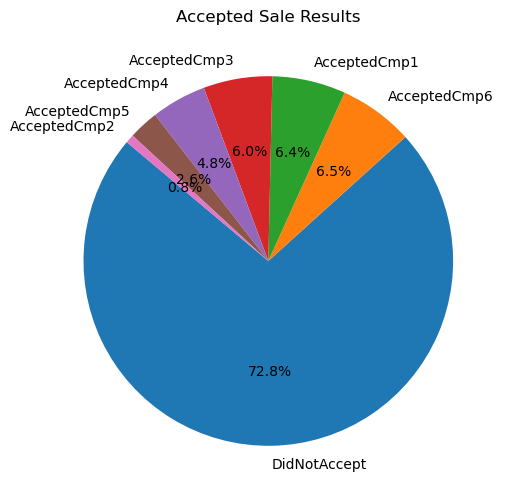

In [6]:
#Pie chart
df = df.rename(columns={'Response': 'AcceptedCmp6'}) # In another task this was supposed to 
#be the response variable, but it actually means that the sale was accepted in the final offer

#The idea is to try predicting when the customer will accept the sale
accepted_columns = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp6"]

df['Result'] = df[accepted_columns].apply(lambda row: row.idxmax() if row.any() else None, axis=1)
df['Result'] = df['Result'].fillna("DidNotAccept")
result_counts = df['Result'].value_counts(normalize=True, sort=True)

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Accepted Sale Results')
plt.show()

In [7]:
#Accepted comp. Is it possible to accept multiple times?
accepted_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']

# Check if at least two columns have a value of 1
x = (df[accepted_cols] == 1).sum(axis=1) >= 2
x.value_counts()

False    2001
True      239
dtype: int64

# Analysis of categorical variables placeholder

The distribution of values within the marital status variable reveals a mixture of standard and unusual entries. Among them, the label "alone" can be appropriately mapped to "single," preserving the underlying information. On the other hand, the designations "Absurd" and "YOLO" present concerns, as they introduce uncertainty and skepticism into the data analysis. Furthermore, the presence of the "YOLO" entry, differing only by acceptance of the final promotional campaign, hints at a potential duplicate observation. As we navigate these intricacies, ensuring data integrity and consistency remains paramount.

In [8]:
#Value counts
df["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [9]:
#YOLO and Absurd
display(df[df["Marital_Status"]=="YOLO"])
df.drop([2177,2202], inplace=True)

display(df[df["Marital_Status"]=="Absurd"])
df.drop([2093,2134], inplace=True)


Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
2177       PhD           YOLO  48432.0        0         1  2012-10-18   
2202       PhD           YOLO  48432.0        0         1  2012-10-18   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
2177        3       322          3               50                4   
2202        3       322          3               50                4   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
2177                 3            42                  5                7   
2202                 3            42                  5                7   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
2177                    1                  6                  8             0   
2202                    1                  6                  8             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
2177             0             0             0             0         0   
2202             0             0             0             0         0   

      AcceptedCmp6  Age  TenureMonths        Result  
2177             0   41         26.77  DidNotAccept  
2202             1   41         26.77  AcceptedCmp6

Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
2093  Graduation         Absurd  79244.0        0         0  2012-12-19   
2134      Master         Absurd  65487.0        0         0  2014-10-01   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
2093       58       471        102              125              212   
2134       48       240         67              500              199   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
2093                61           245                  1                4   
2134                 0           163                  3                3   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
2093                   10                  7                  1             0   
2134                    5                  6                  2             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
2093             0             1             1             0         0   
2134             0             0             0             0         0   

      AcceptedCmp6  Age  TenureMonths        Result  
2093             1   21          24.7  AcceptedCmp1  
2134             0   57           3.0  DidNotAccept

# Income analysis and imputation placeholder

In [10]:
#Replacing alone for single
df["Marital_Status"] = df["Marital_Status"].replace("Alone", "Single")

In [11]:
display(df[df["Income"]==666666.0])

Education Marital_Status    Income  Kidhome  Teenhome Dt_Customer  \
2233  Graduation       Together  666666.0        1         0  2013-02-06   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
2233       23         9         14               18                8   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
2233                 1            12                  4                3   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
2233                    1                  3                  6             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
2233             0             0             0             0         0   

      AcceptedCmp6  Age  TenureMonths        Result  
2233             0   37         23.07  DidNotAccept

<AxesSubplot:xlabel='Income', ylabel='Count'>

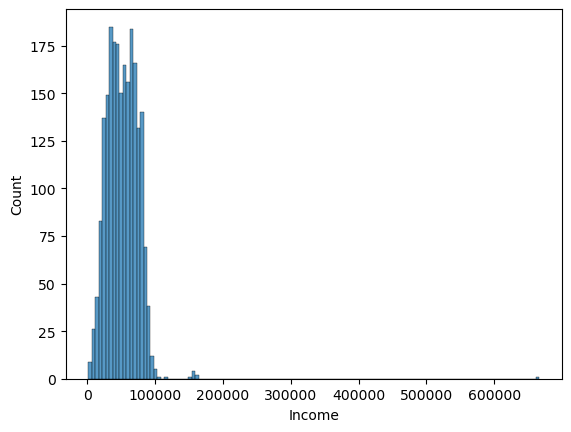

In [12]:
sns.histplot(data=df, x="Income")


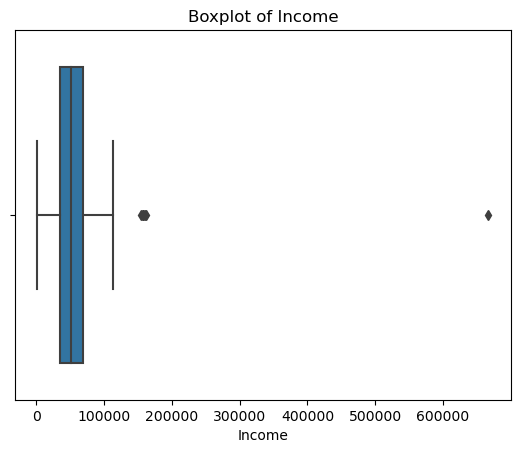

Outliers:


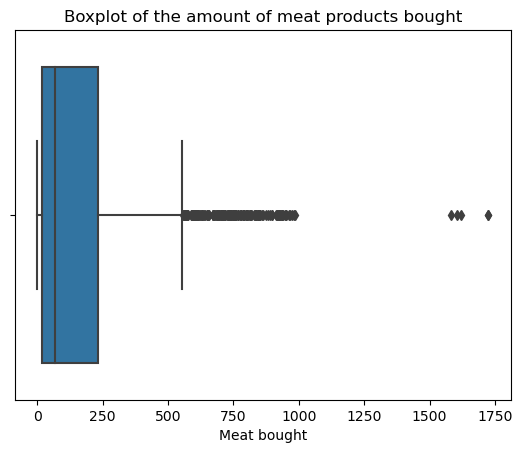

In [13]:
import seaborn as sns

# Create a boxplot to visualize the distribution of the "Income" column
sns.boxplot(data=df, x="Income")
plt.xlabel("Income")
plt.title("Boxplot of Income")
plt.show()

# Calculate the lower and upper fences using Tukey's method
Q1 = df["Income"].quantile(0.25)
Q3 = df["Income"].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Create the OutlierFlag column
df["OutlierFlag"] = (df["Income"] < lower_fence) | (df["Income"] > upper_fence)

# Print the flagged outliers
outliers = df[df["OutlierFlag"]]
print("Outliers:")
outliers.head()


#Testing if indeed, the outliers are not outliers with the 
#outliers = df[(df["MntMeatProducts"] < lower_fence) | (df["MntMeatProducts"] > upper_fence)]
#print(outliers)
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x="MntMeatProducts")
plt.xlabel("Meat bought")
plt.title("Boxplot of the amount of meat products bought")
plt.show()
#Cleaning wise, I would not remove id 164, 687, and 1725 as it seems those are  in terms of the income
#As well as having the largest amounts of meat sold. It seems that these are restaurants that
#buying  supplies from us. Observing the amount of Catalog Purchases shows that these are indeed 
#big spenders. This does mean that due to the outliers, more simple methods of clustering
#might not be the best choice (ie. kmeans) but more advanced ones should be resistant. 
#Further analysis with the OutlierFlag variable will be completed
#This also means that simple averages while analyzing our segments durign the profiling step should
#be replaced with a median
# The 
#It seems that customer 11181 is lying about their income (666,666.0) and as such some other items 
#may be wrong. This observation will be removed
#


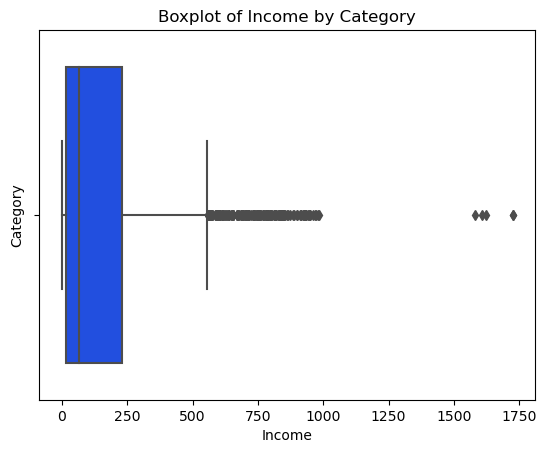

In [14]:
import seaborn as sns


# Create a boxplot with custom color palette
sns.boxplot(data=df, x="MntMeatProducts",  hue="OutlierFlag", palette="bright")
plt.xlabel("Income")
plt.ylabel("Category")
plt.title("Boxplot of Income by Category")
plt.show()


# Placeholder for income imputation

# Placeholder for binning

Certainly, there are several other methods and techniques for optimal binning and segmentation of continuous variables. Here are a few alternatives to consider:

1. **Equal Frequency Binning:** Divide the data into bins such that each bin contains approximately the same number of observations. This approach ensures that each bin captures a similar portion of the data.

2. **Equal Width Binning:** Divide the range of the data into equal-width intervals. While this method is simple, it might not work well if the data distribution is skewed.

3. **Decision Trees:** Decision tree algorithms like CART (Classification and Regression Trees) and CHAID (Chi-square Automatic Interaction Detection) can be used to segment data into bins. Decision trees recursively split the data based on feature values that optimize certain criteria, resulting in naturally segmented bins.

4. **Entropy-Based Binning:** This approach aims to minimize the entropy (uncertainty) within each bin. It seeks to create bins with similar distributions and reduce the information entropy within each bin.

5. **Maximum Distance Binning:** This method involves finding breakpoints that maximize the distance between the means of adjacent bins. The idea is to create bins that are as distinct as possible.

6. **Optimal Binning by Value Distribution:** This technique involves analyzing the distribution of the target variable within each bin to determine if it's homogeneous or heterogeneous. The bins are then optimized to ensure that each bin contains either mostly similar or mostly different target values.

7. **Quantile-Based Binning:** Similar to equal frequency binning, this method involves dividing the data into quantiles, such as quartiles or percentiles. Each bin contains an equal number of data points.

8. **Information Value (IV) Binning:** Used primarily in credit scoring and risk assessment, this method evaluates the predictive power of each bin by calculating the Information Value, which measures the strength of the relationship between a categorical target variable and a continuous predictor variable.

These are just a few examples of binning techniques, and the choice of method often depends on the nature of the data, the goals of the analysis, and the specific problem you're trying to solve. It's important to experiment with different methods and assess their impact on the quality of the resulting bins and their effectiveness in achieving your analytical objectives.

# Clustering Evaluation

The evaluation of clusters will be completed using three indices: the silhouette coeficient, the Calinski-Harabasz index, and the Davies-Bouldin index. These were selected as they do not require the ground truth of which observation belongs to which cluster as well as being capable of being used in all possible clustering methods as they require only the cluster label and the observations themselves.

## Silhouette coefficient
The Silhouette coeficient measure the cohesion and seperation of clusters. It is calculated for each observation and then averaged across all observations. The coefficient itself is bound between -1 and 1 where -1 shows a really badly completed clustering and 1 the opposite; dense very separated clusters. 0 shows overlaping clusters.

Mathematical formulation:

s = (b - a) / (max(a, b) - min(a, b))

Where a is the mean distance between a sample and all of the other points within that cluster and b is the mean distance between a sample and all of the other points of the closest cluster.


## Calinski-Harabasz Index
The Calinski-Harabasz index measure the ration of between cluster variance and within cluster variance.  This method, also known as the Variance Ratio criterion can easily be interpreted as the higher, the better the clustering. 

Mathematical formulation:
 
 CH = (B / W) * (n - k) / (k - 1)

To calculate the index, first the centroid of each cluster is calculated, along with the centroid of all of the datapoints. For each cluster centroid we then calculate the between (b in the formula) and within (w in the formula) dispersion. The between cluster dispersion is defined as the sum of the squared euclidean distances between the centroid of the dataset and the cluster centroids themselves. The within cluster dispersion is defined as the sum of the squared euclidean distances within the clusters, that is the distance between each observation and the cluster centroid.  The Calinski-Harabasz Index is obtained by dividing the between-cluster dispersion (b) by the within-cluster dispersion (w) and then multiplying it by a factor that accounts for the number of data points (n) and the number of clusters (k). The resulting index provides a measure of how well-separated the clusters are and how well the data points are clustered together within each cluster. A higher Calinski-Harabasz Index value indicates better clustering with distinct and well-separated clusters.

## Davies-Bouldin Index
The Davies-Bouldin Index measure the average simmilarity between each cluster and its most simmilar cluster. It is specific among the other non-ground truth needing methods of defining the quality of the clustering in such a way that the lower the score, the better the separation between clusters. 

Mathematical formulation:

DB = (1 / k) * ∑ (max(R_i + R_j) / δ(Ci, Cj))

Where k is the number of clusters, R_i and R_j are the average distance between the cluster and its centroids and δ(Ci, Cj) are the distances between the beforementioned clusters. 

## Score Visualization

The example below illustrates the potential ranges that the aforementioned clustering evaluation metrics can encompass. The top row depicts scenarios where the number of clusters is accurately chosen, aligning with the dataset's inherent centers. The initial chart portrays two clusters, each with minimal standard deviation in their centroids. In this case, the silhouette score approaches its maximum, the Calinski-Harabasz index is substantially high, and the Davies-Bouldin index nearly reaches zero. However, as the clusters' standard deviation expands, leading to greater dispersion, the silhouette score declines, and the Calinski-Harabasz index decreases. Eventually, as clusters overlap or merge, the Davies-Bouldin index rises toward its technical maximum (even though it may not exceed 1 in most cases). During this phase, both the silhouette score and the Calinski-Harabasz index reach their lowest values.

The second row focuses on silhouette scores closer to zero. Here, the datasets are designed with a reduced number of centers compared to the actual clusters. Consequently, some clusters are inevitably unrepresented, leading to diminished scores. This scenario results in both the silhouette coefficient and the Davies-Bouldin index reaching low levels. By augmenting the clusters' standard deviation, the Calinski-Harabasz score also experiences a decline.

In [15]:
#Create the datasets
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate the datasets
datasets = []

# Dataset 1: Good Silhouette, Good DB Index(low), Good CH Index(high)
data_1, _ = make_blobs(n_samples=500, centers=2,cluster_std=0.1, random_state=42)
data_1 = StandardScaler().fit_transform(data_1)
df_1 = pd.DataFrame(data_1, columns=["Feature 1", "Feature 2"])
datasets.append(df_1)

# Dataset 2: Good Silhouette, Bad DB Index(>1), Bad CH Index(low)
data_2, _ = make_blobs(n_samples=500, centers=2, random_state=42)
data_2 = StandardScaler().fit_transform(data_2)
df_2 = pd.DataFrame(data_2, columns=["Feature 1", "Feature 2"])
datasets.append(df_2)

# Dataset 3: Good Silhouette, Bad/Medium DB Index, Good CH Index
data_3, _ = make_blobs(n_samples=500, centers=2,cluster_std=7, random_state=42)
data_3 = StandardScaler().fit_transform(data_3)
df_3 = pd.DataFrame(data_3, columns=["Feature 1", "Feature 2"])
datasets.append(df_3)

##############################
# Dataset 4: Loq Silhouette, Good DB Index, Bad CH Index
data_4, _ = make_blobs(n_samples=500, centers=100,cluster_std=0.1, random_state=42)
data_4 = StandardScaler().fit_transform(data_4)
df_4 = pd.DataFrame(data_4, columns=["Feature 1", "Feature 2"])
datasets.append(df_4)
# Dataset 5: Large number of centers
data_5, _ = make_blobs(n_samples=500, centers=10,  random_state=42)
data_5 = StandardScaler().fit_transform(data_5)
df_5 = pd.DataFrame(data_5, columns=["Feature 1", "Feature 2"])
datasets.append(df_5)
# Dataset 6: Large number of std
data_6, _ = make_blobs(n_samples=500, centers=1, cluster_std=7,random_state=42)
data_6 = StandardScaler().fit_transform(data_6)
df_6 = pd.DataFrame(data_6, columns=["Feature 1", "Feature 2"])
datasets.append(df_6)

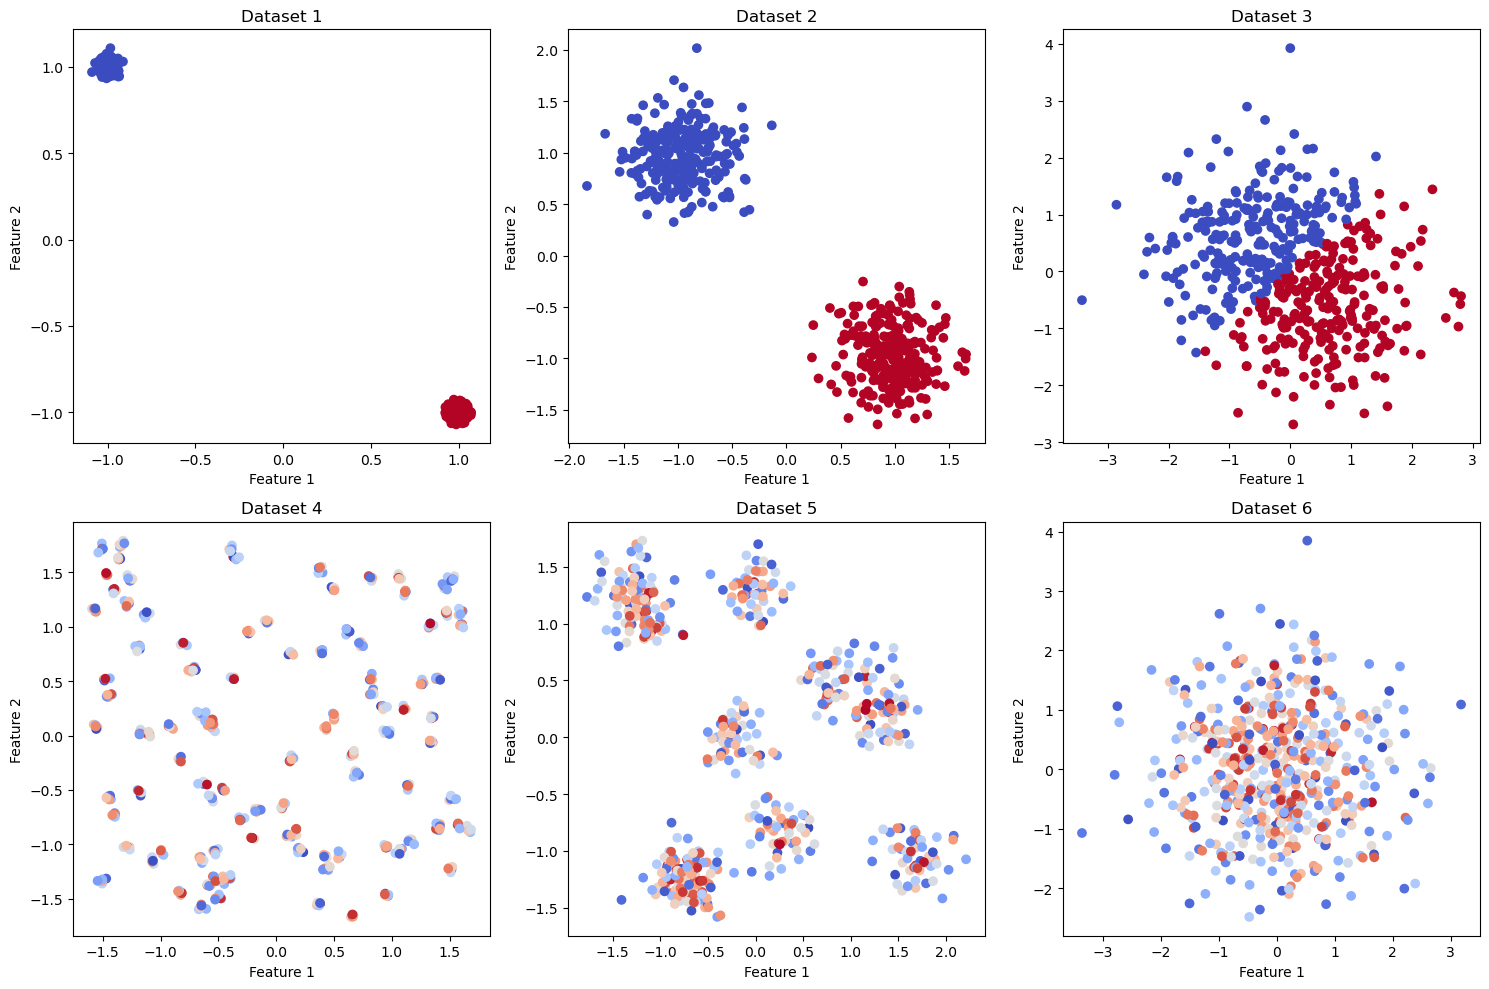

     Dataset  Silhouette Score Calinski-Harabasz Index  Davies-Bouldin Index
0  Dataset 1          0.982662               653833.18              0.024495
1  Dataset 2          0.825833                 6521.63              0.245266
2  Dataset 3          0.362610                  346.07              1.057504
3  Dataset 4          0.003892             16523312.06              0.000255
4  Dataset 5          0.003783             12113610.43              0.000519
5  Dataset 6          0.003556               316675.59              0.002297


In [16]:
#Plot the clustered datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import metrics

# Assuming you have the DataFrames df_1, df_2, ..., df_6 defined
datasets = [df_1, df_2, df_3, df_4, df_5, df_6]
results = []

# Create subplots for all datasets
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, data in enumerate(datasets):
    if i <3:
        n_clusters=2
    else:
        n_clusters=499
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data["segment"] = kmeans.fit_predict(data)
    
    # Calculate the metrics
    silhouette_score = metrics.silhouette_score(data[["Feature 1", "Feature 2"]], data["segment"])
    calinski_harabasz_index = metrics.calinski_harabasz_score(data[["Feature 1", "Feature 2"]], data["segment"])
    formatted_calinski_harabasz_index = f"{calinski_harabasz_index:.2f}"
    davies_bouldin_index = metrics.davies_bouldin_score(data[["Feature 1", "Feature 2"]], data["segment"])
    
    # Append scores to results
    results.append({
        "Dataset": f"Dataset {i+1}",
        "Silhouette Score": silhouette_score,
        "Calinski-Harabasz Index": formatted_calinski_harabasz_index,
        "Davies-Bouldin Index": davies_bouldin_index
    })
    
    # Scatterplot
    ax = axes[i // 3, i % 3]
    scatter = ax.scatter(data["Feature 1"], data["Feature 2"], c=data["segment"], cmap='coolwarm')
    ax.set_title(f"Dataset {i+1}")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    

# Create a dataframe with results
results_df = pd.DataFrame(results)

# Adjust layout and display plots
plt.tight_layout()
plt.show()

# Display the results dataframe
print(results_df)


# RFM 
Recency, Frequency, Monetary (RFM) segmentation is a time-tested method in marketing that holds immense importance in understanding customer behavior and optimizing marketing strategies. Originating in direct mail marketing, RFM has evolved into a versatile framework for segmenting customers based on their interactions with a brand. Recency refers to the time since a customer's last purchase, Frequency measures the number of purchases within a specific period, and Monetary denotes the total amount spent by the customer.

To calculate RFM scores, customers are assigned numerical values for each parameter, resulting in individual scores for Recency, Frequency, and Monetary aspects. These scores are then used to categorize customers into various segments, such as "Champions," "Loyal Customers," "At Risk," and more. The RFM approach is effective because it doesn't rely on demographic information alone; instead, it captures actionable insights directly related to customer engagement and purchasing behavior.

The importance of RFM segmentation lies in its ability to provide actionable insights for targeted marketing campaigns. By categorizing customers based on their engagement level and purchase history, businesses can create tailored messages and offers that resonate with specific segments. This personalization enhances customer experiences, drives repeat purchases, and strengthens brand loyalty. Furthermore, RFM segmentation allows companies to allocate marketing resources efficiently, focusing on high-value segments and preventing customer churn. In a world inundated with data, RFM stands as a reliable and valuable tool for businesses seeking to forge meaningful connections with their customers and optimize marketing outcomes.

## RF clustering

The visualization below illustrates the limitations of relying solely on the "Recency" (R) and "Frequency" (F) metrics from the rfm method. While it holds true that a customer's purchasing frequency contributes to their overall monetary value, this approach fails to distinguish between a customer who makes daily purchases of expensive items like wine and steak, and one who buys a pack of gum daily.

In the context of this analysis, the introduction of cut-off points for manual RF segmentation introduces a nuanced dimension to the comparison of clustering methods. This addition of cut-off points as an evaluation approach is inherently valuable. Although reducing granularity might seem like sacrificing finer details, determining the optimal threshold for these cut-off points can be complex, even with predefined methods as guides. However, employing cut-off points strategically offers compelling advantages.

It acts as a mechanism to reduce noise, resulting in a more refined and insightful clustering outcome. Furthermore, the incorporation of cut-off points has the potential to enhance interpretability, enabling stakeholders to better grasp underlying patterns. Beyond interpretability, the thoughtful use of cut-off points contributes to improving computational efficiency, which is particularly crucial when working with larger datasets.

It's worth noting that while the current dataset might not be extensive, exploring these methodologies can serve as a valuable learning exercise for future iterations. Striking the right balance between granularity and interpretability remains an art; nevertheless, the deliberate integration of cut-off points shows promise in navigating this balance, thereby enhancing the usefulness of clustering outcomes.

In [17]:
# Creating the RFM metrics and removing the variables used in making them
#This is to be done after the data visualization part

df["R"] = df["Recency"]

df["F"] = df["NumDealsPurchases"] + df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

df["M"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

columns_to_drop = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", \
                   "MntSweetProducts", "MntGoldProds", "Recency","NumDealsPurchases",\
                   "NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]
df = df.drop(columns=columns_to_drop)

In [18]:
#Scale and plot the RFM
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


scaler = MinMaxScaler(feature_range=(0,5))
rfm = scaler.fit_transform(df[['R', 'F', 'M']])
rfm = pd.DataFrame(rfm, columns=['R', 'F', 'M'])

import plotly.express as px

fig = px.scatter(rfm, x='R', y='F', color='M')
fig.update_layout(title="RFM Scatter Plot")
fig.show()

## RF cutoff clustering
### The base for comparison

# Placeholder
Here I have to explain how the cutoff calculation is completed. The details on how the scores work is also placed here. These are then explained.

## RF segmentation output

The analysis of customer segments reveals distinct clusters with varying levels of engagement and potential for loyalty. The "Champions" cluster, comprising 8.01% of the customer base, represents a group of enthusiastic supporters who recently made substantial purchases, demonstrating both frequent buying behavior and strong brand loyalty. "Loyal Customers," accounting for 16.68% of the total, exhibit a consistent pattern of purchases over time, indicating their loyalty to the brand. The "Potential Loyalists" group, encompassing 16.06% of customers, though currently displaying moderate purchasing activity, shows promise for future loyalty development. Meanwhile, the "New Customers" cluster, constituting 3.98% of the base, consists of recent purchasers who are still establishing their engagement levels. The "Promising Customers" category, making up 3.40% of the total, holds potential for increased spending through targeted engagement strategies, despite low monetary value. On the other hand, the "Need Attention" group, accounting for 3.71% of customers, requires proactive efforts to maintain their loyalty due to above-average recency, frequency, and spending. "About to Sleep" customers, representing 8.14% of the base, possess a risk of inactivity due to below-average recency and frequency. "At Risk" customers, comprising 15.79% of the total, having made purchases in the past but not recently, warrant retention strategies to prevent loyalty erosion. The "Can't Lose Them" cluster, with a percentage of 7.87%, consists of previously active buyers and should be targeted for re-engagement initiatives. Lastly, the "Hibernating" group, accounting for 16.37% of customers, with prolonged inactivity and few orders, represents a high-risk segment for churn. By understanding these distinct customer segments and their percentage distributions, tailored marketing strategies can be formulated to maximize engagement, loyalty, and ultimately, the brand's success.

In [19]:
#Produce the RFM scores and complete the clusterings
rfm["R_score"] = pd.qcut(rfm['R'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["F_score"] = pd.qcut(rfm['F'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["M_score"] = pd.qcut(rfm['M'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

# RF_SCORE

rfm["RF_SCORE"] = (rfm['R_score'].astype(str) + rfm['F_score'].astype(str))

rfm.head()
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Cant Lose',
    r'3[1-2]': 'About To Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}
rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)

In [20]:
#### Score calculation
##Scores we will be comparing the clusterings on
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculate RFM scores and create segment codes as shown in the previous example

# Calculate clustering metrics using the _score versions
X = rfm[['R_score', 'F_score']]

# Silhouette Coefficient
silhouette_avg = silhouette_score(X, rfm['segment'])

# Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(X, rfm['segment'])

# Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(X, rfm['segment'])

metrics = ["Silhouette Score", "Calinski-Harabasz Index", "Davies-Bouldin Index"]
results_cutoff= pd.DataFrame(index=metrics)
results_cutoff["cut-off"] = [silhouette_avg, calinski_harabasz_index, davies_bouldin_index]


#Calculate the scores using the uncut versions of the variables
X = rfm[['R', 'F']]

# Silhouette Coefficient
silhouette_avg = silhouette_score(X, rfm['segment'])

# Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(X, rfm['segment'])

# Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(X, rfm['segment'])

results_cutoff["cut-off-regular"] = [silhouette_avg, calinski_harabasz_index, davies_bouldin_index]


/home/siki/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:964: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.

/home/siki/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:964: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.

/home/siki/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:964: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



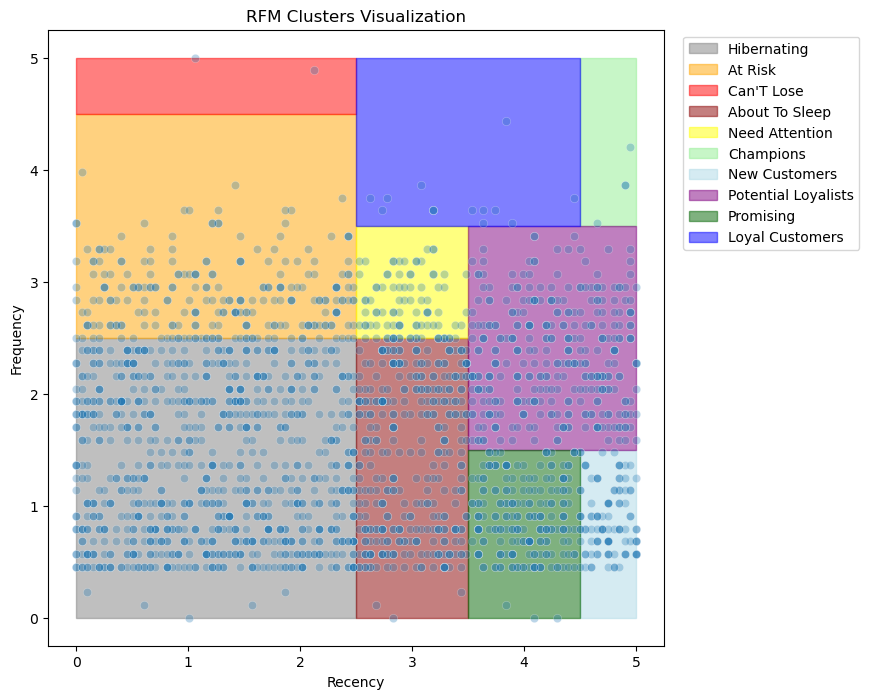

cut-off  cut-off-regular
Silhouette Score            0.461983         0.236084
Calinski-Harabasz Index  2331.090311      1678.949095
Davies-Bouldin Index        0.679719         1.006976

In [21]:
#Creating the cluster visualization and printing the scores
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for scatterplot



plt.figure(figsize=(10, 8))

# Define the coordinates for each segment
segments = {
    "hibernating": ([0, 0, 2.5, 2.5, 0], [0, 2.5, 2.5, 0, 0], "grey"),
    "at_risk": ([0, 0, 2.5, 2.5, 0], [2.5, 4.5, 4.5, 2.5, 2.5], "orange"),
    "can't_lose": ([0, 0, 2.5, 2.5, 0], [4.5, 5, 5, 4.5, 4.5], "red"),
    "about_to_sleep": ([2.5, 2.5, 3.5, 3.5, 2.5], [0, 2.5, 2.5, 0, 0], "darkred"),
    "need_attention": ([2.5, 2.5, 3.5, 3.5, 2.5], [2.5, 3.5, 3.5, 2.5, 2.5], "yellow"),
    "champions": ([4.5, 4.5, 5, 5, 4.5], [3.5, 5, 5, 3.5, 3.5], "lightgreen"),
    "new_customers": ([4.5, 4.5, 5, 5, 4.5], [0, 1.5, 1.5, 0, 0], "lightblue"),
    "potential_loyalists": ([3.5, 3.5, 5, 5, 3.5], [1.5, 3.5, 3.5, 1.5, 1.5], "purple"),
    "promising": ([3.5, 3.5, 4.5, 4.5, 3.5], [0, 1.5, 1.5, 0, 0], "darkgreen"),
    "loyal_customers": ([2.5, 2.5, 4.5, 4.5, 2.5], [3.5, 5, 5, 3.5, 3.5], "blue"),
}

# Plot the filled polygons for each segment
for segment, (x, y, color) in segments.items():
    plt.fill(x, y, color=color, alpha=0.5, label=segment.replace('_', ' ').title())

# Create a scatterplot of data points
sns.scatterplot(data=rfm, x='R', y='F', alpha=0.3)

# Set the aspect ratio to 'equal' to ensure the squares are not distorted
plt.gca().set_aspect('equal')

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Set labels and title
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('RFM Clusters Visualization')

# Display the plot
plt.show()
results_cutoff.head()

In [22]:
#The details on the segment distributions
import pandas as pd

# Assuming 'data' is your DataFrame and 'segment_variable' is the variable/column
segment_value_counts = rfm['segment'].value_counts()
total_count = len(rfm)

# Calculate the percentages
segment_percentages = (segment_value_counts / total_count) * 100

# Create a new DataFrame to display the results
percentage_table = pd.DataFrame({
    'Percentage': segment_percentages
})

# Sort the DataFrame by count in descending order
percentage_table = percentage_table.sort_values(by='Percentage', ascending=False)

print(percentage_table)


                     Percentage
Loyal Customers       16.681574
Hibernating           16.368515
Potential Loyalists   16.055456
At Risk               15.787120
About To Sleep         8.139535
Champions              8.005367
Cant Lose              7.871199
New Customers          3.980322
Need Attention         3.711986
Promising              3.398927


## Kmeans



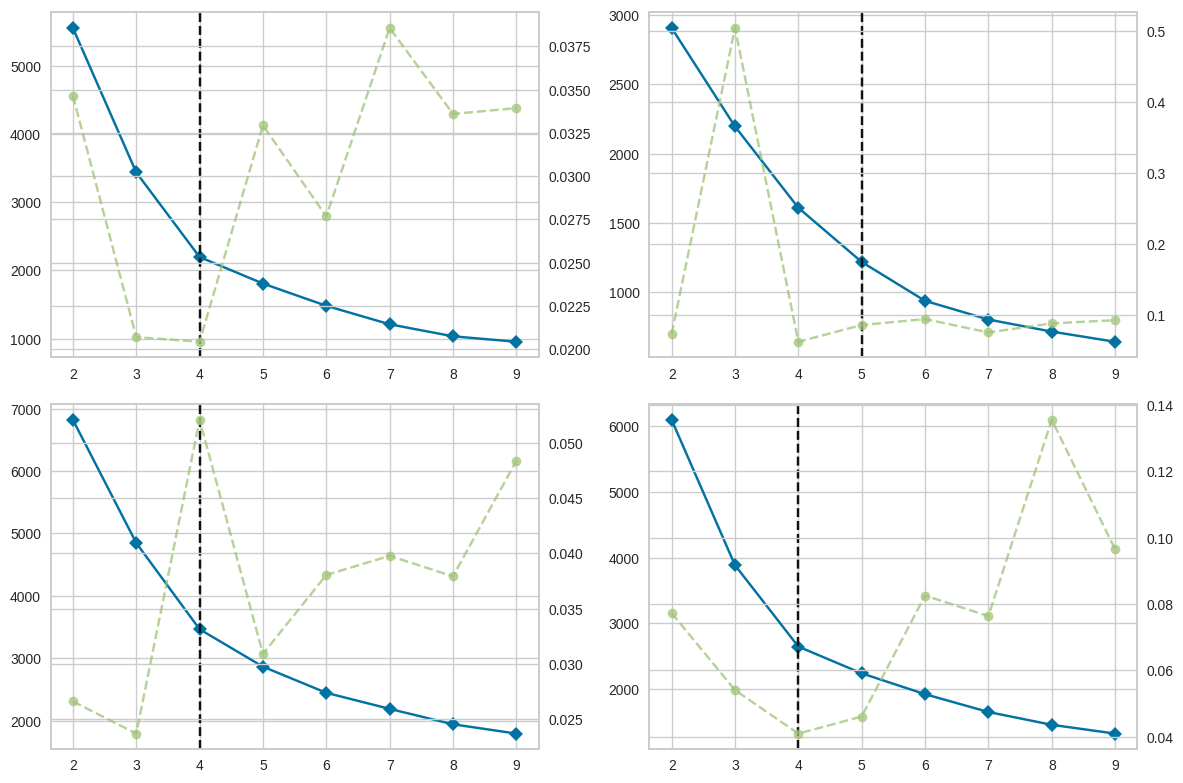

In [23]:
#Create the clusterings and visualize the elbow plot
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd

# Convert scores to numeric format
rfm['R_score'] = rfm['R_score'].astype(int)
rfm['F_score'] = rfm['F_score'].astype(int)
rfm['M_score'] = rfm['M_score'].astype(int)

# Create the feature matrices x_bin and x_cont
X_RF_bin = rfm[['R_score', 'F_score']]
X_RF_cont = rfm[['R', 'F']] 
X_RFM_bin = rfm[['R_score', 'F_score',"M_score"]]
X_RFM_cont = rfm[['R', 'F',"M"]] 

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Initialize the results dictionary
results = {}

# Loop through the datasets
for dataset_name, dataset, ax_row_col in zip(["RF with Cutoff", "RF without Cutoff", "RFM with Cutoff", "RFM without Cutoff"],
                                 [X_RF_bin, X_RF_cont, X_RFM_bin, X_RFM_cont],
                                 [(0, 0), (0, 1), (1, 0), (1, 1)]):
    
    ax_row, ax_col = ax_row_col
    
    # K-means clustering
    kmeans = KMeans(random_state=42)
    visualizer = KElbowVisualizer(kmeans, k=(2, 10), ax=axes[ax_row, ax_col])  # Pass the axis
    visualizer.fit(dataset)

    best_k = visualizer.elbow_value_
    kmeans = KMeans(n_clusters=best_k, random_state=42)
    kmeans.fit(dataset)

    rfm[f"{dataset_name}_kmeans_cluster"] = kmeans.labels_

    # Calculate silhouette score
    silhouette_avg = silhouette_score(dataset, rfm[f"{dataset_name}_kmeans_cluster"])
    # Calinski-Harabasz Index
    calinski_harabasz_index = calinski_harabasz_score(dataset, rfm[f"{dataset_name}_kmeans_cluster"])
    # Davies-Bouldin Index
    davies_bouldin_index = davies_bouldin_score(dataset, rfm[f"{dataset_name}_kmeans_cluster"])

    results[f"{dataset_name}_kmeans"] = [silhouette_avg, calinski_harabasz_index, davies_bouldin_index]

# Convert the results dictionary to a DataFrame for easier visualization
results_df = pd.DataFrame(results, index=["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"])
plt.tight_layout()
plt.show()  # Display the subplots


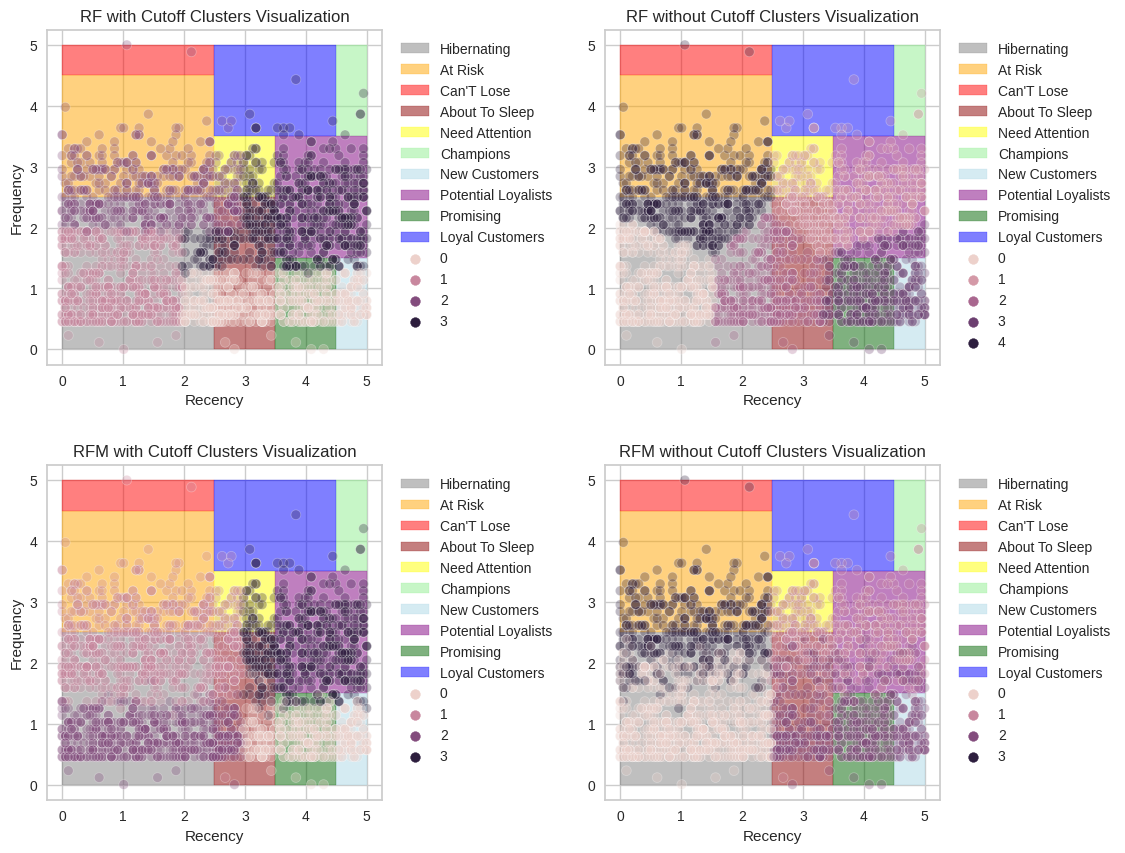

                   RF with Cutoff_kmeans  RF without Cutoff_kmeans  \
Silhouette                      0.440617                  0.388074   
Calinski-Harabasz            2286.134883               2410.630720   
Davies-Bouldin                  0.783865                  0.833729   

                   RFM with Cutoff_kmeans  RFM without Cutoff_kmeans  
Silhouette                       0.393975                   0.404132  
Calinski-Harabasz             2139.057475                1976.753241  
Davies-Bouldin                   0.921602                   0.874663  


In [24]:
#Produce the clustering visualization and print out the scores
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for scatterplot

# Convert scores to numeric format
rfm['R_score'] = rfm['R_score'].astype(int)
rfm['F_score'] = rfm['F_score'].astype(int)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Define the coordinates for each segment
segments = {
    "hibernating": ([0, 0, 2.5, 2.5, 0], [0, 2.5, 2.5, 0, 0], "grey"),
    "at_risk": ([0, 0, 2.5, 2.5, 0], [2.5, 4.5, 4.5, 2.5, 2.5], "orange"),
    "can't_lose": ([0, 0, 2.5, 2.5, 0], [4.5, 5, 5, 4.5, 4.5], "red"),
    "about_to_sleep": ([2.5, 2.5, 3.5, 3.5, 2.5], [0, 2.5, 2.5, 0, 0], "darkred"),
    "need_attention": ([2.5, 2.5, 3.5, 3.5, 2.5], [2.5, 3.5, 3.5, 2.5, 2.5], "yellow"),
    "champions": ([4.5, 4.5, 5, 5, 4.5], [3.5, 5, 5, 3.5, 3.5], "lightgreen"),
    "new_customers": ([4.5, 4.5, 5, 5, 4.5], [0, 1.5, 1.5, 0, 0], "lightblue"),
    "potential_loyalists": ([3.5, 3.5, 5, 5, 3.5], [1.5, 3.5, 3.5, 1.5, 1.5], "purple"),
    "promising": ([3.5, 3.5, 4.5, 4.5, 3.5], [0, 1.5, 1.5, 0, 0], "darkgreen"),
    "loyal_customers": ([2.5, 2.5, 4.5, 4.5, 2.5], [3.5, 5, 5, 3.5, 3.5], "blue"),
}


# Loop through the datasets
for dataset_name, dataset, ax_row_col in zip(["RF with Cutoff", "RF without Cutoff", "RFM with Cutoff", "RFM without Cutoff"],
                                 [X_RF_bin, X_RF_cont, X_RFM_bin, X_RFM_cont],
                                 [(0, 0), (0, 1), (1, 0), (1, 1)]):

    # Create scatterplot on the corresponding subplot
    ax_row, ax_col = ax_row_col
    ax = axes[ax_row, ax_col]
    
    # Plot the filled polygons for each segment
    for segment, (x, y, color) in segments.items():
        ax.fill(x, y, color=color, alpha=0.5, label=segment.replace('_', ' ').title())

    # Create a scatterplot of data points
    sns.scatterplot(data=rfm, x='R', y='F', hue=f"{dataset_name}_kmeans_cluster", alpha=0.3, ax=ax)

    # Set the aspect ratio to 'equal' to ensure the squares are not distorted
    ax.set_aspect('equal')

    # Add legend
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

    # Set labels and title
    ax.set_xlabel('Recency')
    
    # Remove y-label on the second and fourth charts
    if ax_col == 0:
        ax.set_ylabel('Frequency')
    else:
        ax.set_ylabel('')
        
    ax.set_title(f'{dataset_name} Clusters Visualization')

# Adjust layout and display the subplots
plt.subplots_adjust(wspace=0.5,hspace=0.3)

plt.show()
print(results_df)


# Hierarchical clustering

This clustering method is specific in the way that it starts with each datapoint being its own cluster. Each of these clusters is then gradually merged depending on how close it is to the other clusters. This continues until all of the data points are in a single cluster. Depending on the distance metric, the analyst can then control the number of clusters. The exact method of defining how a cluster is made is called the linkeage. In this analysis we will be using the single, complete, average, and ward linkeage.
The single linkeage defines the distance between clusters as the minimum distance between any two observations. 
Complete linkeage is the opposite of single linkeage and defines the distance as the maximum distance between two points.
Average linekage, as the name implies, takes the average distance between all of the data points.
Wards linkeage uses euclidean distance and tries to minimize the cluster variance when combining clusters.

Dendrograms, visual depictions of hierarchical clustering, serve as insightful tools by illustrating how data points form clusters. The vertical axis signifies dissimilarity, with branches merging at varying heights, portraying cluster amalgamations. The horizontal axis represents individual data points. Connective lines indicate where clusters merge, and branching patterns reflect relationships—short branches suggest similarity, while longer ones indicate greater dissimilarity. Selecting a cutoff on the vertical axis establishes clusters, with vertical lines extending to the horizontal axis denoting cluster counts. Interpretation involves assigning labels, and nested structures unveil hierarchical associations. Overall, dendrograms provide a visual avenue for exploring data groupings, facilitating insights and exploration.


### Exploring Hierarchical Clustering with Binned RF Values

Within the realm of the complete linkage method, discernible cluster arrangements come to light at specific distance thresholds. Notably, a distance of 4 yields a clustering solution characterized by 4 distinct clusters. Likewise, a distance of 2.7 corresponds to a scenario encompassing 5 clusters, while a distance of 2 leads to the emergence of a 9-cluster configuration. Shifting our attention to the average linkage method, the most suitable cluster counts manifest as 4, 5, and 9, aligning with distances of 25, 16, and 15 respectively.

The dendrogram generated using the Ward linkage method suggests a range of optimal cluster counts. Specifically, this method prompts consideration of configurations involving 2, 3, 4, and 9 clusters at respective distances of 70, 60, 45, and 20. The exploration of these diverse linkage methods and their associated cluster counts provides valuable insights into the underlying structure of the data, enabling informed decision-making in the realm of hierarchical clustering.

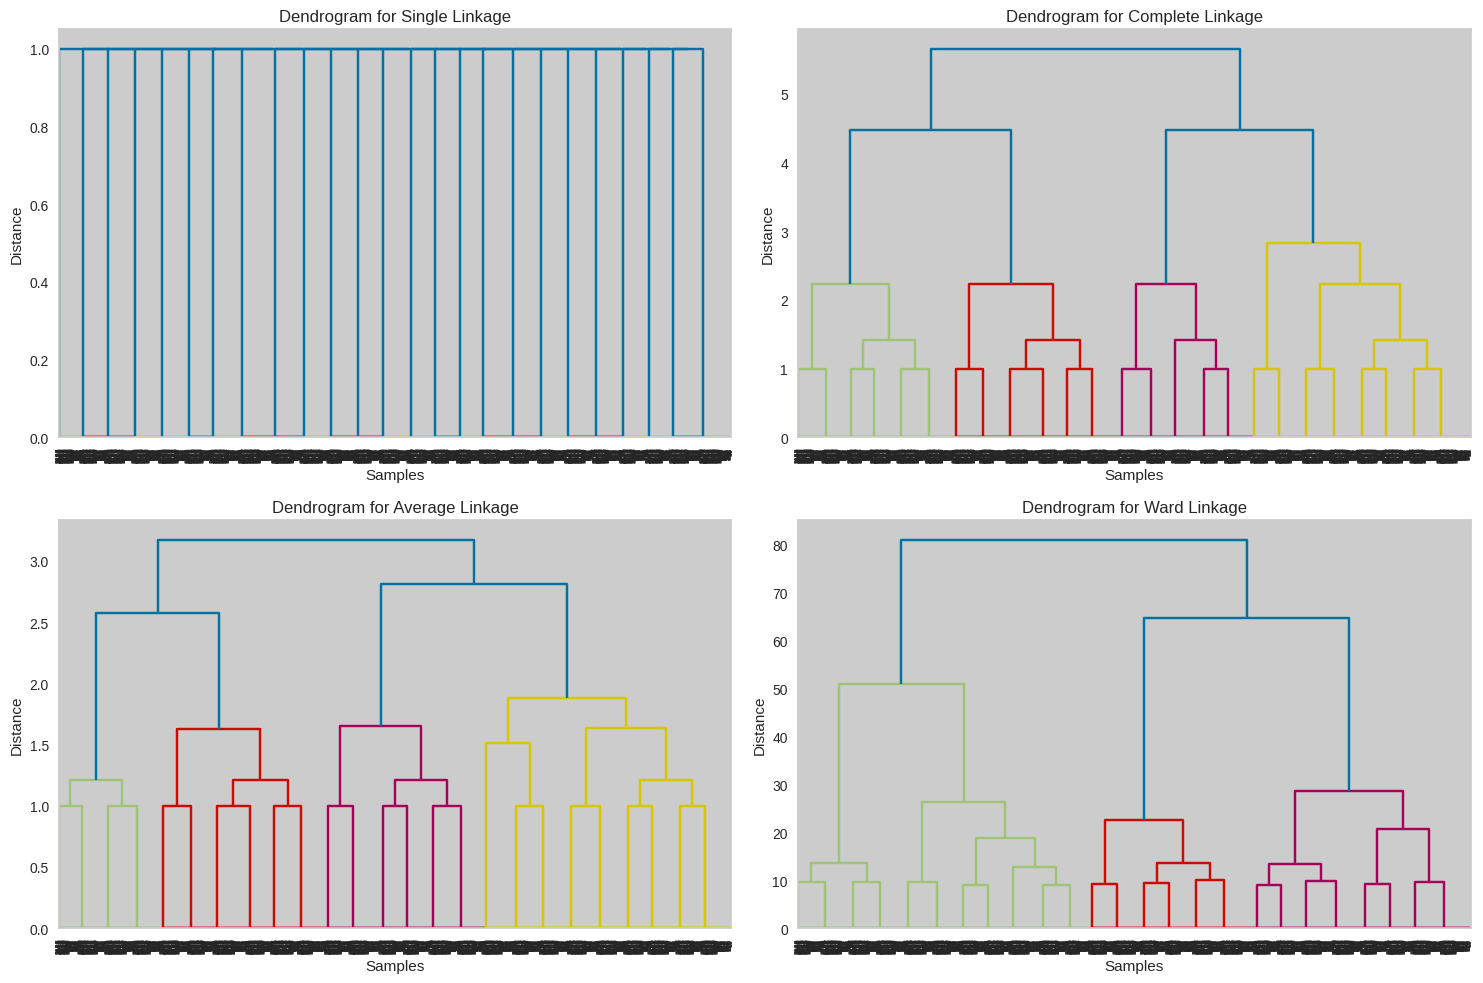

In [25]:
## Hierarchical clustering with RF binned values
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

methods = ['single', 'complete', 'average', 'ward']  # List of linkage methods

plt.figure(figsize=(15, 10))  # Adjust the figure size if needed

for i, method in enumerate(methods):
    # Perform hierarchical clustering
    Z = linkage(X_RF_bin, method=method)
    
    # Plot the dendrogram
    plt.subplot(2, 2, i+1)  # Create subplots for each method
    dendrogram(Z)
    plt.title(f'Dendrogram for {method.capitalize()} Linkage')
    plt.xlabel('Samples')
    plt.ylabel('Distance')

plt.tight_layout()  # Adjust the layout of subplots
plt.show()


Presented below are the evaluation results encompassing the Silhouette Score, Calinski-Harabasz index, and Davies-Bouldin index for the RF segmentation conducted using binned values. Within the context of these metrics, the Complete linkage method with 9 clusters emerges as a standout performer, boasting the highest Silhouette Score along with the most favorable Calinski-Harabasz index. The compelling combination of these metrics underscores the potential effectiveness of this configuration.

The prominence of the 9-cluster solution under the Complete linkage method can be attributed to its ability to emphasize distinctiveness between clusters. However, it's noteworthy that the larger number of clusters introduces a heightened likelihood of overlap, which in turn contributes to the relatively elevated Davies-Bouldin index. This outcome serves as an illustrative example of the delicate balance between maximizing silhouette scores and mitigating overlap.

Shifting our focus to the Average method, the 9-cluster alternative demonstrates commendable metrics, aligning closely with the outcomes of the Complete linkage approach. Notably, this 9-cluster configuration exhibits a lower Silhouette Score and a reduced Davies-Bouldin index, signifying clusters that are somewhat less dense yet notably less susceptible to overlapping. This nuanced trade-off underscores the intricate interplay between cluster density and overlap.

Encouragingly, the Ward method also highlights the 9-cluster solution as a top contender, mirroring the density characteristics of the Complete linkage method while exhibiting a comparable propensity for overlap. As such, the 9-cluster choice emerges as an appealing candidate across multiple linkage methods.
In light of these insights, our selection falls upon the 9-cluster option utilizing the Complete linkage method. This decision is substantiated by its impressive Silhouette Score and closely comparable characteristics in terms of overlap and potential cluster misclassification. This choice strikes a harmonious balance between maximizing distinctiveness and minimizing the risk of overlap, aligning well with the overarching goals of the RF segmentation analysis using binned values.

In [26]:
#Differentiating agglomerative clusters, RF with binned values
print("*"*50)
print("Differentiating agglomerative clusters, RF with binned values")
print("*"*50)
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, dendrogram

# Define linkage methods and cutoffs for each method
linkage_methods = ['complete', 'average', 'ward']
cutoffs = {
    'complete': [4, 5, 9],
    'average': [4, 5, 9],
    'ward': [2, 3, 4, 9]
}

# Perform hierarchical clustering and compare silhouette scores
for method in linkage_methods:
    print(f"Linkage Method: {method.capitalize()}")
    print("-----------------------")
    
    for cutoff in cutoffs.get(method, []):
        print(f"Clusters: {cutoff}")
        
        # Perform hierarchical clustering
        if method == 'ward':
            hc = AgglomerativeClustering(n_clusters=cutoff, linkage=method, connectivity=None)
        else:
            hc = AgglomerativeClustering(n_clusters=cutoff, linkage=method)
            
        labels = hc.fit_predict(X_RF_bin)
        
        # Calculate silhouette score
        silhouette_avg = silhouette_score(X_RF_bin, labels)
        # Calinski-Harabasz Index
        calinski_harabasz_index = calinski_harabasz_score(X_RF_bin, labels)
        # Davies-Bouldin Index
        davies_bouldin_index = davies_bouldin_score(X_RF_bin, labels)
        
        print(f"Silhouette Score: {silhouette_avg:.4f}")
        print(f"Calinski-Harabasz index: {calinski_harabasz_index:.4f}")
        print(f"Davies-Bouldin index: {davies_bouldin_index:.4f}")
        
        print("-----------------------")
    print("=======================")


**************************************************
Differentiating agglomerative clusters, RF with binned values
**************************************************
Linkage Method: Complete
-----------------------
Clusters: 4
Silhouette Score: 0.4371
Calinski-Harabasz index: 2261.9161
Davies-Bouldin index: 0.7772
-----------------------
Clusters: 5
Silhouette Score: 0.4022
Calinski-Harabasz index: 2094.5854
Davies-Bouldin index: 0.8117
-----------------------
Clusters: 9
Silhouette Score: 0.4856
Calinski-Harabasz index: 2552.4007
Davies-Bouldin index: 0.8245
-----------------------
Linkage Method: Average
-----------------------
Clusters: 4
Silhouette Score: 0.4361
Calinski-Harabasz index: 2234.3582
Davies-Bouldin index: 0.7427
-----------------------
Clusters: 5
Silhouette Score: 0.4357
Calinski-Harabasz index: 2191.6946
Davies-Bouldin index: 0.8773
-----------------------
Clusters: 9
Silhouette Score: 0.4751
Calinski-Harabasz index: 2541.9682
Davies-Bouldin index: 0.7593
-------------

## Exploring hierarchical clustering with RF continuous values

The dendrograms depicted below provides insight into potential cutoff points and the corresponding number of clusters for each linkage method. he dendrogram visual below provides a clear overview of possible segmentation breakpoints and their corresponding cluster counts for each linkage method. 
Shifting our attention to the average linkage approach, we identify clusters forming at distances of 25, 16, and 15. These distances yield 4, 5, and 9 clusters, respectively. In contrast, the Ward linkage method introduces a different set of possibilities. At distances of 70, 60, 45, and 20, the corresponding cluster counts are 2, 3, 4, and 9 clusters, respectively.

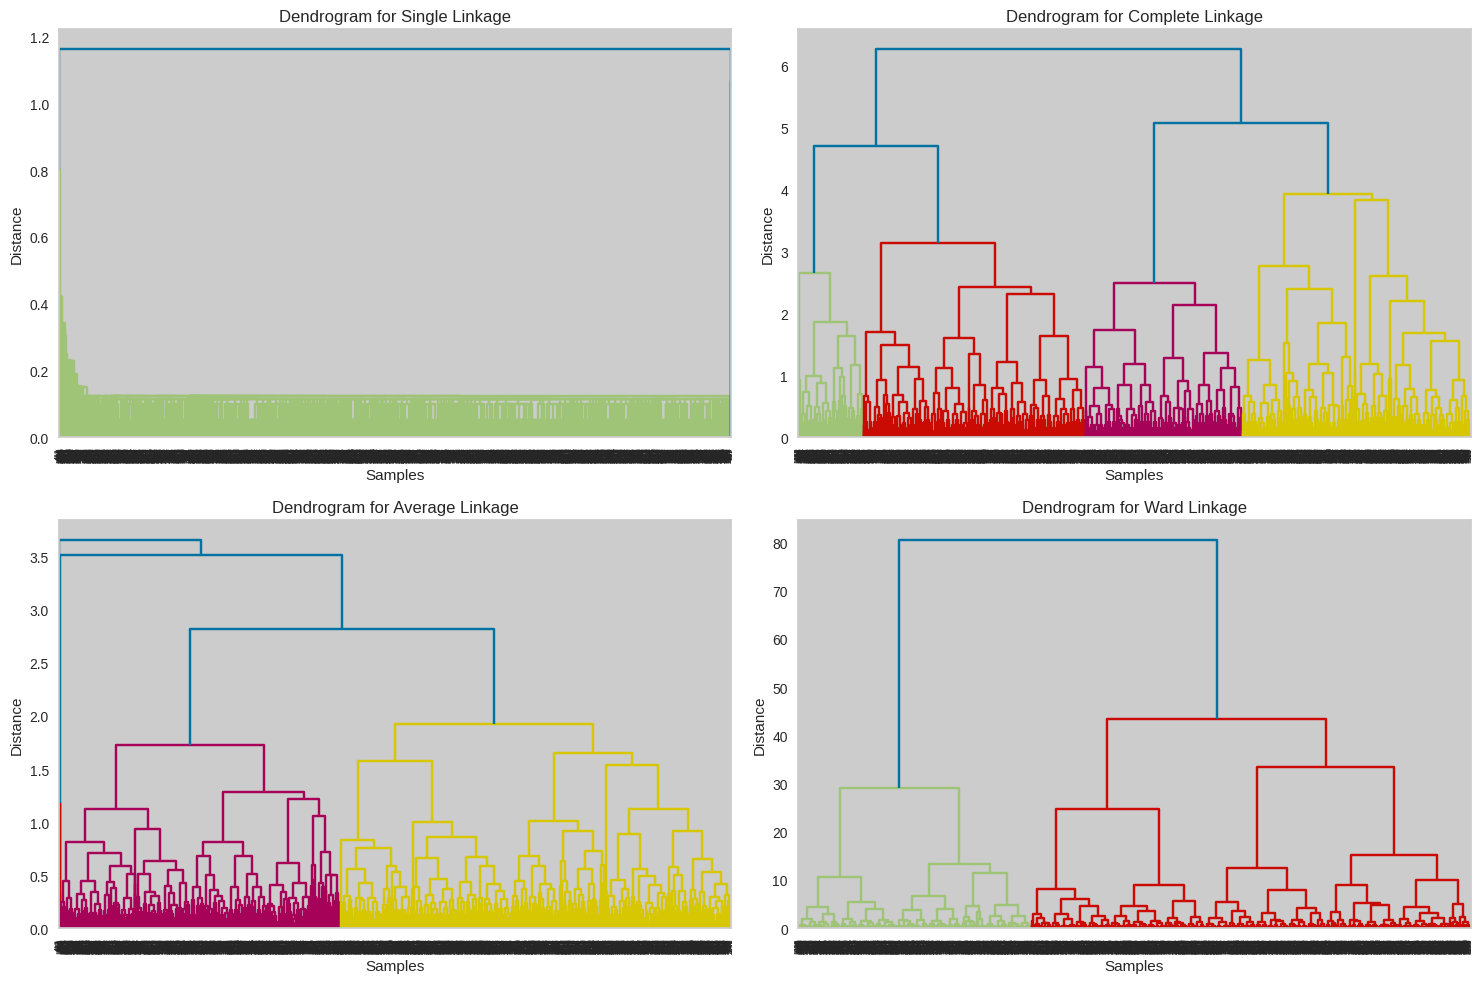

In [27]:
## Hierarchical clustering with RF continuous values
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

methods = ['single', 'complete', 'average', 'ward']  # List of linkage methods

plt.figure(figsize=(15, 10))  # Adjust the figure size if needed

for i, method in enumerate(methods):
    # Perform hierarchical clustering
    Z = linkage(X_RF_cont, method=method)
    
    # Plot the dendrogram
    plt.subplot(2, 2, i+1)  # Create subplots for each method
    dendrogram(Z)
    plt.title(f'Dendrogram for {method.capitalize()} Linkage')
    plt.xlabel('Samples')
    plt.ylabel('Distance')

plt.tight_layout()  # Adjust the layout of subplots
plt.show()


Comparing the results, it's evident that the linkage method with 2 segments outperforms the one with 3 segments in all metrics. The 2-segment option showcases stronger scores across the board—its clusters are more compact, exhibit greater inter-cluster distance, and have reduced overlap. When juxtaposed with the average linkage method, the 2-segment complete linkage method boasts a higher silhouette score and superior Calinski-Harabasz index. In contrast, the average linkage method yields clusters with minimal overlap, promoting improved decision-making through more precise resource allocation, reduced segmentation uncertainty, and easier interpretation. The decision between these solutions hinges on the objectives and analytical context. Opting for the first solution might be ideal if creating well-defined segments for targeted marketing or decision-making is paramount, given its superior silhouette score and CH index. On the other hand, if the focus is on ensuring distinct cluster separation to address concerns about misclassification and overlap, the second solution—with a stronger DB index—might offer a more appropriate fit. For the scope of this analysis, where no specific priority has been established, a preference will be given to the 2/3 segmentation approach. In this context, the complete linkage method with two clusters will be selected for further comparison but significant disparities between future options will influence future selections.

In [28]:
#Differentiating agglomerative clusters, RF with continous values
print("*"*50)
print("Differentiating agglomerative clusters, RF with continoous values")
print("*"*50)
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, dendrogram



# Define linkage methods and cutoffs for each method
linkage_methods = ['complete', 'average', 'ward']
cutoffs = {
    'complete': [2, 3],
    'average': [13, 9, 5, 4],
    'ward': [9, 4]
}

# Perform hierarchical clustering and compare silhouette scores
for method in linkage_methods:
    print(f"Linkage Method: {method.capitalize()}")
    print("-----------------------")
    
    for cutoff in cutoffs.get(method, []):
        print(f"Clusters: {cutoff}")
        
        # Perform hierarchical clustering
        if method == 'ward':
            hc = AgglomerativeClustering(n_clusters=cutoff, linkage=method, connectivity=None)
        else:
            hc = AgglomerativeClustering(n_clusters=cutoff, linkage=method)
            
        labels = hc.fit_predict(X_RF_cont)
        
        # Calculate silhouette score
        silhouette_avg = silhouette_score(X_RF_cont, labels)
        # Calinski-Harabasz Index
        calinski_harabasz_index = calinski_harabasz_score(X_RF_cont, labels)
        # Davies-Bouldin Index
        davies_bouldin_index = davies_bouldin_score(X_RF_cont, labels)
        
        print(f"Silhouette Score: {silhouette_avg:.4f}")
        print(f"Calinski-Harabasz index: {calinski_harabasz_index:.4f}")
        print(f"Davies-Bouldin index: {davies_bouldin_index:.4f}")
        
        print("-----------------------")
    print("=======================")


**************************************************
Differentiating agglomerative clusters, RF with continoous values
**************************************************
Linkage Method: Complete
-----------------------
Clusters: 2
Silhouette Score: 0.3932
Calinski-Harabasz index: 2056.3226
Davies-Bouldin index: 0.9416
-----------------------
Clusters: 3
Silhouette Score: 0.3371
Calinski-Harabasz index: 1714.1898
Davies-Bouldin index: 1.0271
-----------------------
Linkage Method: Average
-----------------------
Clusters: 13
Silhouette Score: 0.3276
Calinski-Harabasz index: 1315.9588
Davies-Bouldin index: 0.6627
-----------------------
Clusters: 9
Silhouette Score: 0.3416
Calinski-Harabasz index: 1482.3442
Davies-Bouldin index: 0.7154
-----------------------
Clusters: 5
Silhouette Score: 0.3404
Calinski-Harabasz index: 1058.9992
Davies-Bouldin index: 0.8625
-----------------------
Clusters: 4
Silhouette Score: 0.3443
Calinski-Harabasz index: 880.3810
Davies-Bouldin index: 0.7315
---------

## Exploring hieararchical clustering with RFM binned values
The complete linkage method presents a set of intriguing clustering choices at specific distances. Notably, distances of 6, 5, 4, and 3 correspond to cluster counts of 2, 4, 6, and 13 respectively. Meanwhile, the average linkage method suggests cluster formations at distances of 37, 30, 25, and 20, resulting in cluster counts of 2, 3, 5, and 7 respectively. The Ward linkage method produces cluster configurations at distances of 70, 60, 40, and 25, yielding cluster counts of 2, 3, 4, and 6 respectively.

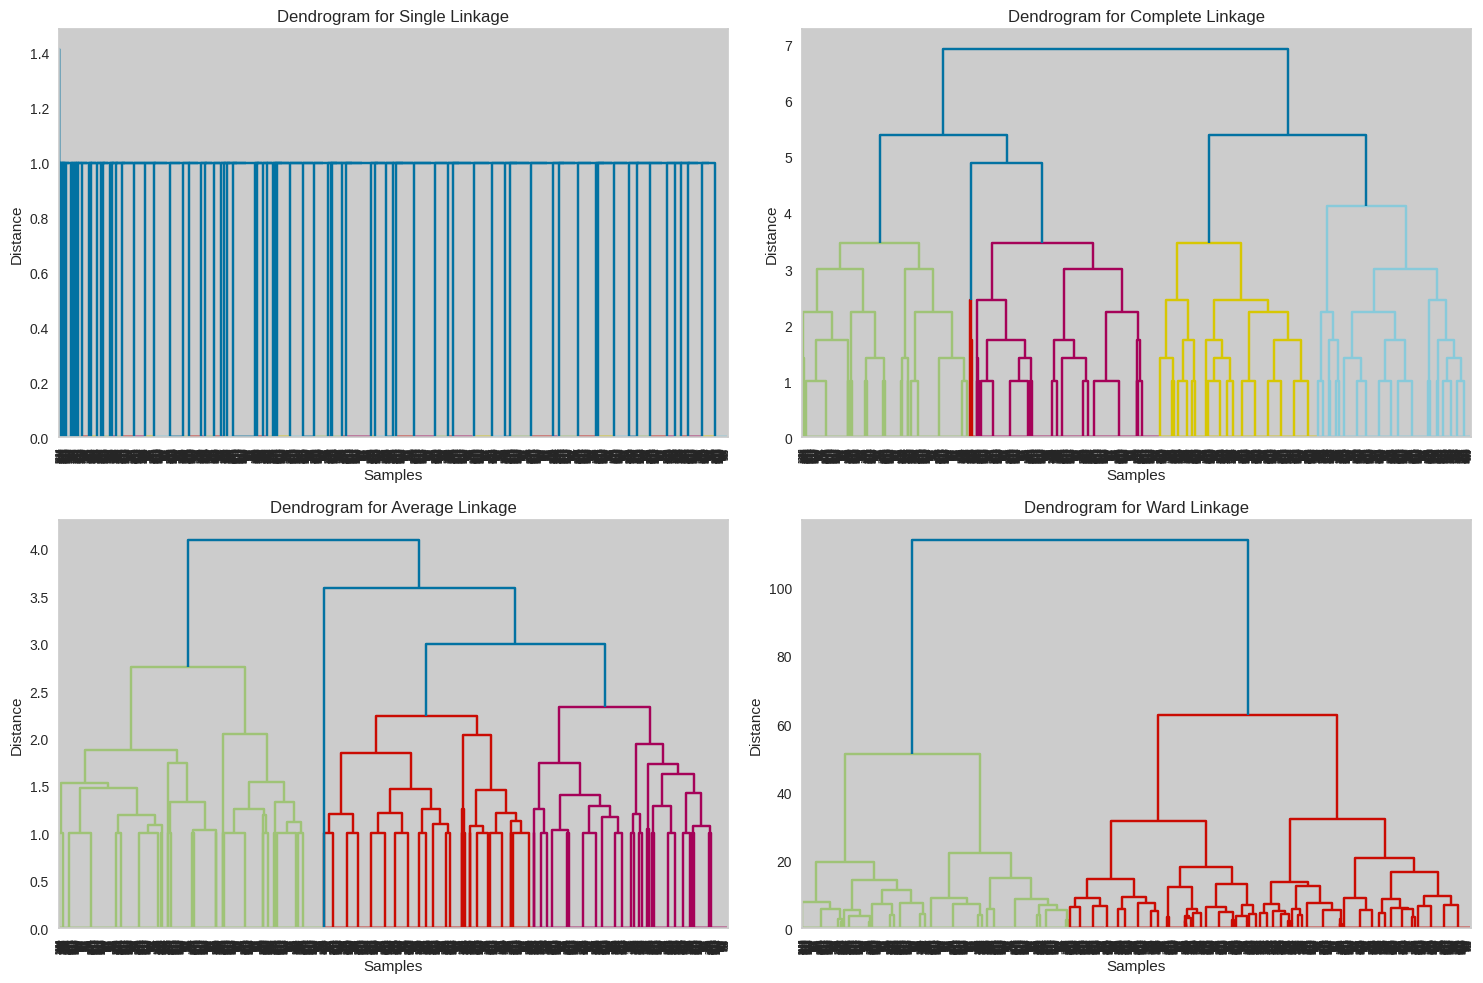

In [29]:
## Hierarchical clustering with RFM binned values
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

methods = ['single', 'complete', 'average', 'ward']  # List of linkage methods

plt.figure(figsize=(15, 10))  # Adjust the figure size if needed

for i, method in enumerate(methods):
    # Perform hierarchical clustering
    Z = linkage(X_RFM_bin, method=method)
    
    # Plot the dendrogram
    plt.subplot(2, 2, i+1)  # Create subplots for each method
    dendrogram(Z)
    plt.title(f'Dendrogram for {method.capitalize()} Linkage')
    plt.xlabel('Samples')
    plt.ylabel('Distance')

plt.tight_layout()  # Adjust the layout of subplots
plt.show()


The analysis of RFM binned values indicates a preference for fewer clusters, with the scenario involving two clusters showcasing the highest silhouette score among all alternatives. Upon comparing the Ward and average linkage methods, both of which exhibit better silhouette scores in comparison to the complete method, a noteworthy observation emerges. The Ward linkage method not only provides a superior Davies-Bouldin index but also outperforms in terms of the Calinski-Harabasz index. This combination implies a clustering solution characterized by improved cluster separation and reduced overlap. As such, we select the Ward linkeage method with two clusters. 

In [30]:
#Differentiating agglomerative clusters, RFM with binned values
print("*"*50)
print("Differentiating agglomerative clusters, RFM with binned values")
print("*"*50)
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, dendrogram



# Define linkage methods and cutoffs for each method
linkage_methods = ['complete', 'average', 'ward']
cutoffs = {
    'complete': [2, 4, 6, 13],
    'average': [2,3,5,7],
    'ward': [2,3,4,6]
}

# Perform hierarchical clustering and compare silhouette scores
for method in linkage_methods:
    print(f"Linkage Method: {method.capitalize()}")
    print("-----------------------")
    
    for cutoff in cutoffs.get(method, []):
        print(f"Clusters: {cutoff}")
        
        # Perform hierarchical clustering
        if method == 'ward':
            hc = AgglomerativeClustering(n_clusters=cutoff, linkage=method, connectivity=None)
        else:
            hc = AgglomerativeClustering(n_clusters=cutoff, linkage=method)
            
        labels = hc.fit_predict(X_RFM_bin)
        
        # Calculate silhouette score
        silhouette_avg = silhouette_score(X_RFM_bin, labels)
        # Calinski-Harabasz Index
        calinski_harabasz_index = calinski_harabasz_score(X_RFM_bin, labels)
        # Davies-Bouldin Index
        davies_bouldin_index = davies_bouldin_score(X_RFM_bin, labels)
        
        print(f"Silhouette Score: {silhouette_avg:.4f}")
        print(f"Calinski-Harabasz index: {calinski_harabasz_index:.4f}")
        print(f"Davies-Bouldin index: {davies_bouldin_index:.4f}")
        
        print("-----------------------")
    print("=======================")


**************************************************
Differentiating agglomerative clusters, RFM with binned values
**************************************************
Linkage Method: Complete
-----------------------
Clusters: 2
Silhouette Score: 0.4046
Calinski-Harabasz index: 1967.3781
Davies-Bouldin index: 0.9995
-----------------------
Clusters: 4
Silhouette Score: 0.3463
Calinski-Harabasz index: 1822.1954
Davies-Bouldin index: 1.0267
-----------------------
Clusters: 6
Silhouette Score: 0.2456
Calinski-Harabasz index: 1250.5512
Davies-Bouldin index: 1.1191
-----------------------
Clusters: 13
Silhouette Score: 0.2989
Calinski-Harabasz index: 1170.5045
Davies-Bouldin index: 1.2916
-----------------------
Linkage Method: Average
-----------------------
Clusters: 2
Silhouette Score: 0.4272
Calinski-Harabasz index: 2094.4193
Davies-Bouldin index: 0.9406
-----------------------
Clusters: 3
Silhouette Score: 0.3524
Calinski-Harabasz index: 1049.8324
Davies-Bouldin index: 0.8138
-----------

## Exploring hieararchical clustering with RFM continous values

The following dendrograms present a variety of intriguing clustering possibilities using the continuous values of the RFM clustering method. Complete linkage clustering reveals four distinct options, yielding cluster counts of 2, 4, 5, and 9 at respective distances of 6.5, 5.5, 5, and 3.5. Similarly, the average linkage method also offers four distinct clustering choices, situated at distances of 35, 30, 25, and 20, resulting in cluster counts of 2, 3, 6, and 8. Lastly, the Ward linkage method provides three distinct options at distances of 70, 60, and 50, resulting in cluster counts of 2, 3, and 4 respectively.

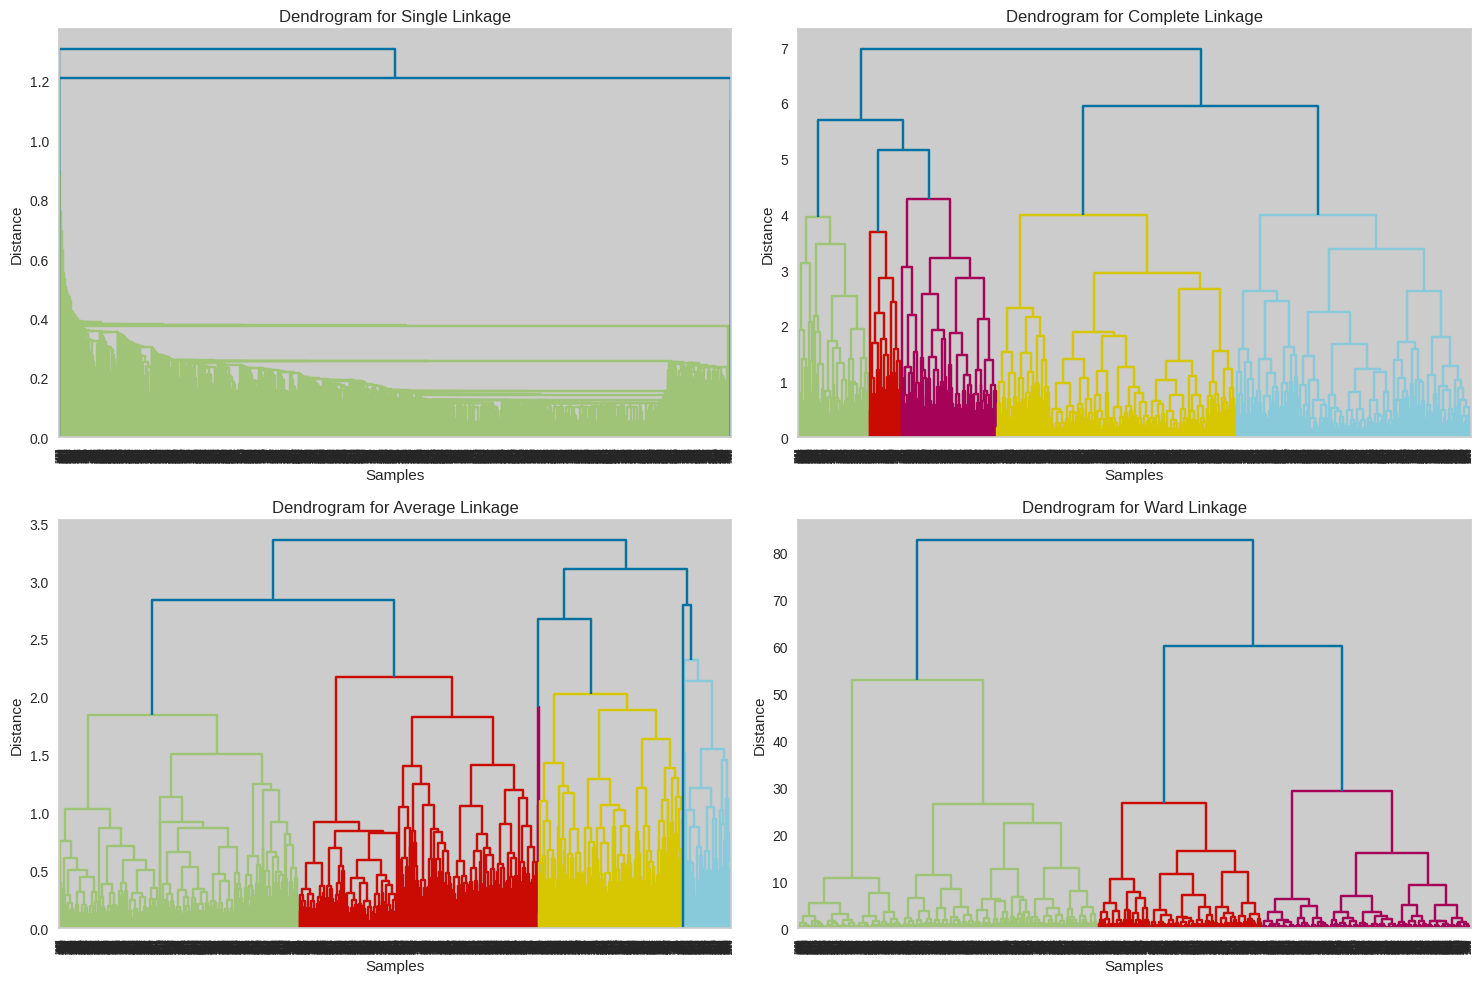

In [31]:
## Hierarchical clustering with RFM continuous values
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

methods = ['single', 'complete', 'average', 'ward']  # List of linkage methods

plt.figure(figsize=(15, 10))  # Adjust the figure size if needed

for i, method in enumerate(methods):
    # Perform hierarchical clustering
    Z = linkage(X_RFM_cont, method=method)
    
    # Plot the dendrogram
    plt.subplot(2, 2, i+1)  # Create subplots for each method
    dendrogram(Z)
    plt.title(f'Dendrogram for {method.capitalize()} Linkage')
    plt.xlabel('Samples')
    plt.ylabel('Distance')

plt.tight_layout()  # Adjust the layout of subplots
plt.show()


The silhouette scores experience an enhancement with the introduction of four clusters, but the silhouette score diminishes for each subsequent cluster when considering the complete linkage option. Interestingly, all configurations for this linkage method result in Davies-Bouldin indices that surpass the typical threshold of 1.Comparatively, the average linkage method demonstrates improvement over complete linkage, with Davies-Bouldin index values that, while still significant, are not as unfavorable. Remarkably, the silhouette scores decline as the number of clusters increases, and the Calinski-Harabasz index exhibits variability. For the Ward linkage method, the scenario with two clusters boasts the highest silhouette score among the presented options. However, as the number of clusters increases, the silhouette score and other associated metrics decrease. 

For this solution we select the ward linkeage with four clusters

In [32]:
#Differentiating agglomerative clusters, RFM with continus values
print("*"*50)
print("Differentiating agglomerative clusters, RFM with continous values")
print("*"*50)
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, dendrogram



# Define linkage methods and cutoffs for each method
linkage_methods = ['complete', 'average', 'ward']
cutoffs = {
    'complete': [2, 4, 5, 9],
    'average': [2,3,6,8],
    'ward': [2,3,4]
}

# Perform hierarchical clustering and compare silhouette scores
for method in linkage_methods:
    print(f"Linkage Method: {method.capitalize()}")
    print("-----------------------")
    
    for cutoff in cutoffs.get(method, []):
        print(f"Clusters: {cutoff}")
        
        # Perform hierarchical clustering
        if method == 'ward':
            hc = AgglomerativeClustering(n_clusters=cutoff, linkage=method, connectivity=None)
        else:
            hc = AgglomerativeClustering(n_clusters=cutoff, linkage=method)
            
        labels = hc.fit_predict(X_RFM_cont)
        
        # Calculate silhouette score
        silhouette_avg = silhouette_score(X_RFM_cont, labels)
        # Calinski-Harabasz Index
        calinski_harabasz_index = calinski_harabasz_score(X_RFM_cont, labels)
        # Davies-Bouldin Index
        davies_bouldin_index = davies_bouldin_score(X_RFM_cont, labels)
        
        print(f"Silhouette Score: {silhouette_avg:.4f}")
        print(f"Calinski-Harabasz index: {calinski_harabasz_index:.4f}")
        print(f"Davies-Bouldin index: {davies_bouldin_index:.4f}")
        
        print("-----------------------")
    print("=======================")


**************************************************
Differentiating agglomerative clusters, RFM with continous values
**************************************************
Linkage Method: Complete
-----------------------
Clusters: 2
Silhouette Score: 0.3003
Calinski-Harabasz index: 900.4182
Davies-Bouldin index: 1.2971
-----------------------
Clusters: 4
Silhouette Score: 0.3270
Calinski-Harabasz index: 1367.6738
Davies-Bouldin index: 1.0520
-----------------------
Clusters: 5
Silhouette Score: 0.3176
Calinski-Harabasz index: 1174.6610
Davies-Bouldin index: 1.0141
-----------------------
Clusters: 9
Silhouette Score: 0.2505
Calinski-Harabasz index: 1034.9156
Davies-Bouldin index: 1.1941
-----------------------
Linkage Method: Average
-----------------------
Clusters: 2
Silhouette Score: 0.3235
Calinski-Harabasz index: 959.5646
Davies-Bouldin index: 1.2824
-----------------------
Clusters: 3
Silhouette Score: 0.2702
Calinski-Harabasz index: 738.9843
Davies-Bouldin index: 0.9857
------------

## Optimal Clusters from Agglomerative Clustering

To summarize, the most favorable cluster configurations achieved through agglomerative clustering methods are as follows:

- For the RF binned values, the **complete linkage** method with **9 clusters** is identified as optimal. ( &#8598; in chart)
- When considering the RF continuous values, the **complete linkage** method with **2 clusters** emerges as the preferred choice. ( &#8599; in chart)
- In the case of RFM binned values, the **ward linkage** method with **2 clusters** is determined to be the best fit. ( &#8601; in chart)
- Finally, for RFM continuous values, the **ward linkage** method with **4 clusters** is adopted. ( &#8600; in chart)

These choices are determined by evaluating a range of clustering metrics, guaranteeing that the clustering results align with the dataset's attributes and analytical objectives. A comparison reveals that the most effective approach is observed when applying complete linkage with 9 clusters to the RF binned values. This method outperforms the others across all metrics, leading to denser, more distinct clusters with reduced likelihood of overlap.

In [34]:
#Comparing the top clusters produced by agglomerative clustering

#instantiating the results_df to hold the metrics:
results_df = pd.DataFrame(index=["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"])

for dataset_name, dataset, clustering in zip(["RF with Cutoff", "RF without Cutoff", "RFM with Cutoff", "RFM without Cutoff"],
                                            [X_RF_bin, X_RF_cont, X_RFM_bin, X_RFM_cont],
                                             [("complete",9),("complete",2),("ward",2),("ward",4)]):
    linkage, n_clusters = clustering
    if linkage == "ward":
        hc=AgglomerativeClustering(n_clusters=n_clusters, linkage=str(linkage))
    else:
        hc=AgglomerativeClustering(n_clusters=n_clusters, linkage=str(linkage))
    
    rfm[f"{dataset_name}_agg_clustering"] = hc.fit_predict(dataset)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(dataset, rfm[f"{dataset_name}_agg_clustering"])
    # Calinski-Harabasz Index
    calinski_harabasz_index = calinski_harabasz_score(dataset, rfm[f"{dataset_name}_agg_clustering"])
    # Davies-Bouldin Index
    davies_bouldin_index = davies_bouldin_score(dataset, rfm[f"{dataset_name}_agg_clustering"])
    #Transfering the results to the dataframe
    results_df[f"{dataset_name}_agg"] = [silhouette_avg, calinski_harabasz_index, davies_bouldin_index]



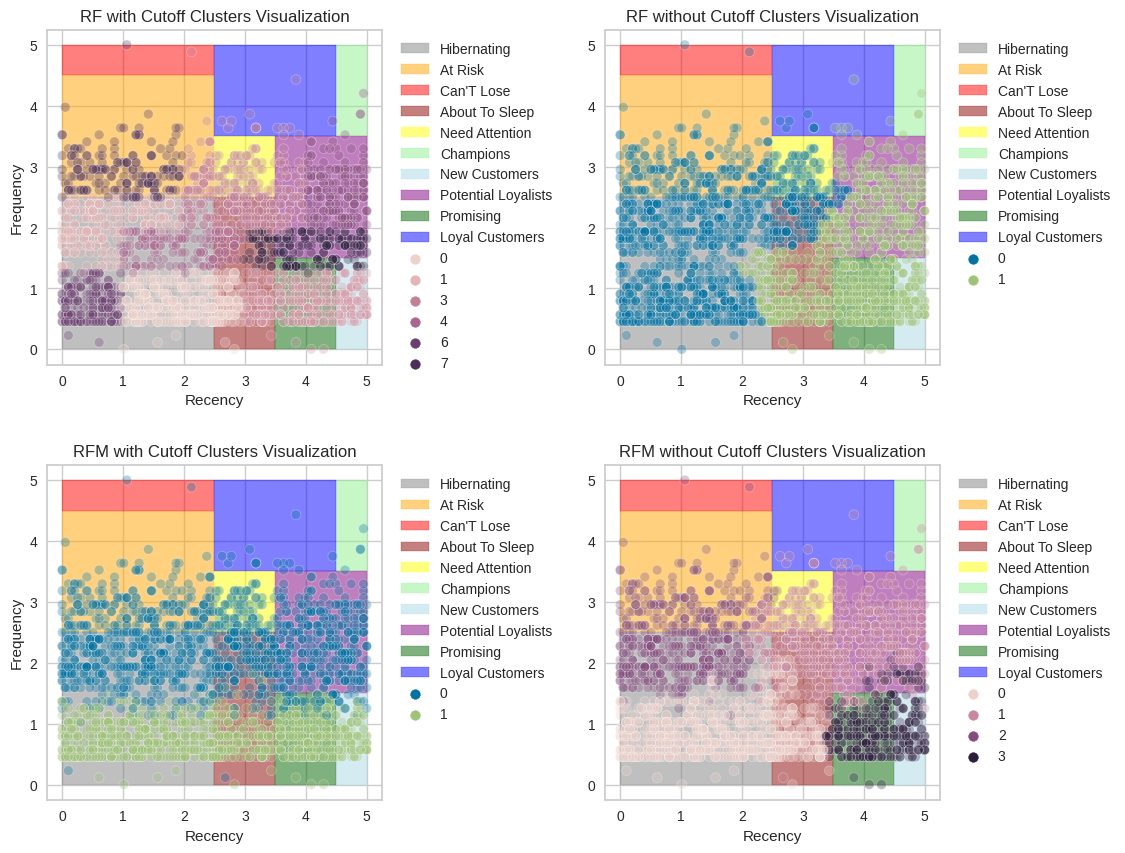

                   RF with Cutoff_agg  RF without Cutoff_agg  \
Silhouette                   0.485594               0.393217   
Calinski-Harabasz         2552.400694            2056.322586   
Davies-Bouldin               0.824508               0.941585   

                   RFM with Cutoff_agg  RFM without Cutoff_agg  
Silhouette                    0.428446                0.355095  
Calinski-Harabasz          2108.011795             1611.833045  
Davies-Bouldin                0.940222                0.907818  


In [35]:
#Produce the clustering visualization and print out the scores
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for scatterplot

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Define the coordinates for each segment
segments = {
    "hibernating": ([0, 0, 2.5, 2.5, 0], [0, 2.5, 2.5, 0, 0], "grey"),
    "at_risk": ([0, 0, 2.5, 2.5, 0], [2.5, 4.5, 4.5, 2.5, 2.5], "orange"),
    "can't_lose": ([0, 0, 2.5, 2.5, 0], [4.5, 5, 5, 4.5, 4.5], "red"),
    "about_to_sleep": ([2.5, 2.5, 3.5, 3.5, 2.5], [0, 2.5, 2.5, 0, 0], "darkred"),
    "need_attention": ([2.5, 2.5, 3.5, 3.5, 2.5], [2.5, 3.5, 3.5, 2.5, 2.5], "yellow"),
    "champions": ([4.5, 4.5, 5, 5, 4.5], [3.5, 5, 5, 3.5, 3.5], "lightgreen"),
    "new_customers": ([4.5, 4.5, 5, 5, 4.5], [0, 1.5, 1.5, 0, 0], "lightblue"),
    "potential_loyalists": ([3.5, 3.5, 5, 5, 3.5], [1.5, 3.5, 3.5, 1.5, 1.5], "purple"),
    "promising": ([3.5, 3.5, 4.5, 4.5, 3.5], [0, 1.5, 1.5, 0, 0], "darkgreen"),
    "loyal_customers": ([2.5, 2.5, 4.5, 4.5, 2.5], [3.5, 5, 5, 3.5, 3.5], "blue"),
}


# Loop through the datasets
for dataset_name, dataset, ax_row_col in zip(["RF with Cutoff", "RF without Cutoff", "RFM with Cutoff", "RFM without Cutoff"],
                                 [X_RF_bin, X_RF_cont, X_RFM_bin, X_RFM_cont],
                                 [(0, 0), (0, 1), (1, 0), (1, 1)]):

    # Create scatterplot on the corresponding subplot
    ax_row, ax_col = ax_row_col
    ax = axes[ax_row, ax_col]
    
    # Plot the filled polygons for each segment
    for segment, (x, y, color) in segments.items():
        ax.fill(x, y, color=color, alpha=0.5, label=segment.replace('_', ' ').title())

    # Create a scatterplot of data points
    sns.scatterplot(data=rfm, x='R', y='F', hue=f"{dataset_name}_agg_clustering", alpha=0.3, ax=ax)

    # Set the aspect ratio to 'equal' to ensure the squares are not distorted
    ax.set_aspect('equal')

    # Add legend
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

    # Set labels and title
    ax.set_xlabel('Recency')
    
    # Remove y-label on the second and fourth charts
    if ax_col == 0:
        ax.set_ylabel('Frequency')
    else:
        ax.set_ylabel('')
        
    ax.set_title(f'{dataset_name} Clusters Visualization')

# Adjust layout and display the subplots
plt.subplots_adjust(wspace=0.5,hspace=0.3)

plt.show()
print(results_df)


## Mean shift

he Mean Shift algorithm is a powerful clustering technique that operates by identifying dense regions within a given dataset. Unlike some other clustering methods, Mean Shift excels in detecting clusters with irregular and non-linear shapes. This unique ability makes it particularly well-suited for scenarios where traditional methods might struggle to accurately capture the underlying structures.

One of the most distinctive features of the Mean Shift algorithm is its non-parametric nature. This means that the algorithm doesn't assume a fixed number of clusters in advance, unlike methods such as k-means. Instead, it relies on a crucial parameter known as the "bandwidth." This bandwidth essentially determines the radius of the circular region around each data point within which the algorithm searches for dense regions. The bandwidth parameter plays a significant role in the algorithm's behavior. A smaller bandwidth leads to smaller search regions, resulting in more fine-grained clustering. Conversely, a larger bandwidth can lead to larger clusters that encompass more data points. 

The process begins by selecting a starting data point and then iteratively shifting it towards higher density areas. The movement is guided by the local density gradient, and the data point effectively climbs towards the peak of a density hill. This hill-climbing behavior continues until convergence is achieved, at which point the algorithm has identified a mode of the underlying density distribution. Each mode corresponds to a cluster center.

### Mean shift output

In the context of the Mean Shift algorithm, we conducted an exploration using a range of bandwidth values, spanning from 1 to 3 in increments of 0.5. As with previous algorithms, we also use different versions of the dataset for experimentation.

For the RF binned dataset, we discovered that a bandwidth of 2.5 yielded the most favorable clustering outcome. At this bandwidth, the silhouette score reached a notable 0.43, the Calinski-Harabasz index stood at 2050, and the Davies-Bouldin index attained a value of 0.85. 
However, when we applied the Mean Shift algorithm to the RF dataset containing continuous values, the results were less promising. The silhouette score for this dataset was merely 0.26, indicating that the algorithm struggled to find meaningful cluster structures. The corresponding Calinski-Harabasz index scored 1340, while the Davies-Bouldin index reached 0.86. Unfortunately, these scores did not inspire confidence in the clustering quality. Shifting our focus to the RFM binned dataset, we observed that this algorithm performed exceptionally well. The dataset achieved a silhouette score of 0.52, indicating a strong clustering structure. The Calinski-Harabasz index and Davies-Bouldin index also yielded impressive scores, highlighting the overall quality of the clustering. However, it's worth noting that the number of resulting clusters was relatively high, with 26 clusters detected. In contrast, the RFM dataset with continuous values did not exhibit the same level of success. The highest silhouette score achieved was a modest 0.36, suggesting that the algorithm struggled to establish distinct clusters within the data. 

In conclusion, despite the seemingly intricate configuration of 26 clusters identified by the RFM binned dataset using a bandwidth of 1, this algorithm remarkably yields the highest silhouette score. Thus, it stands as the most compelling choice to showcase to the managers.

In [48]:
# Mean shift RF binned
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#define bandwidths
bandwidths = [1.0, 1.5, 2.0, 2.5, 3.0]

# Perform meanshift clustering and compare silhouette scores
for bandwidth in bandwidths:
    print(f"Bandwidth: {bandwidth}")
    meanshift = MeanShift(bandwidth=bandwidth)
    labels = meanshift.fit_predict(X_RF_bin)
    unique_labels = len(np.unique(labels))
    print("This bandwidth found "+str(unique_labels)+" clusters.")

    
    unique_labels = len(np.unique(labels))
    if unique_labels < 2:
        print("Only one cluster formed. Skipping silhouette score calculation.")
    else:
        # Calculate silhouette score
        silhouette_avg = silhouette_score(X_RF_bin, labels)
        calinski_harabasz_index = calinski_harabasz_score(X_RF_bin, labels)
        davies_bouldin_index = davies_bouldin_score(X_RF_bin, labels)
        
        
        print(f"Silhouette Score: {silhouette_avg:.4f}")
        print(f"Calinski-Harabasz index: {calinski_harabasz_index:.4f}")
        print(f"Davies-Bouldin index: {davies_bouldin_index:.4f}")
        
    print("-----------------------")


Bandwidth: 1.0
This bandwidth found 7 clusters.
Silhouette Score: 0.3623
Calinski-Harabasz index: 1827.9786
Davies-Bouldin index: 1.1292
-----------------------
Bandwidth: 1.5
This bandwidth found 5 clusters.
Silhouette Score: 0.4326
Calinski-Harabasz index: 2047.5190
Davies-Bouldin index: 0.8464
-----------------------
Bandwidth: 2.0
This bandwidth found 2 clusters.
Silhouette Score: 0.3267
Calinski-Harabasz index: 1078.9143
Davies-Bouldin index: 1.2440
-----------------------
Bandwidth: 2.5
This bandwidth found 1 clusters.
Only one cluster formed. Skipping silhouette score calculation.
-----------------------
Bandwidth: 3.0
This bandwidth found 1 clusters.
Only one cluster formed. Skipping silhouette score calculation.
-----------------------


In [49]:
# Mean shift RF continous
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#define bandwidths
bandwidths = [1.0, 1.5, 2.0, 2.5, 3.0]

# Perform meanshift clustering and compare silhouette scores
for bandwidth in bandwidths:
    print(f"Bandwidth: {bandwidth}")
    meanshift = MeanShift(bandwidth=bandwidth)
    labels = meanshift.fit_predict(X_RF_cont)
    unique_labels = len(np.unique(labels))
    print("This bandwidth found "+str(unique_labels)+" clusters.")

    if unique_labels < 2:
        print("Only one cluster formed. Skipping silhouette score calculation.")
    else:
        # Calculate silhouette score
        silhouette_avg = silhouette_score(X_RF_cont, labels)
        calinski_harabasz_index = calinski_harabasz_score(X_RF_cont, labels)
        davies_bouldin_index = davies_bouldin_score(X_RF_cont, labels)
        
        print(f"Silhouette Score: {silhouette_avg:.4f}")
        print(f"Calinski-Harabasz index: {calinski_harabasz_index:.4f}")
        print(f"Davies-Bouldin index: {davies_bouldin_index:.4f}")
        
    print("-----------------------")


Bandwidth: 1.0
This bandwidth found 7 clusters.
Silhouette Score: 0.2617
Calinski-Harabasz index: 1339.6108
Davies-Bouldin index: 0.9092
-----------------------
Bandwidth: 1.5
This bandwidth found 1 clusters.
Only one cluster formed. Skipping silhouette score calculation.
-----------------------
Bandwidth: 2.0
This bandwidth found 1 clusters.
Only one cluster formed. Skipping silhouette score calculation.
-----------------------
Bandwidth: 2.5
This bandwidth found 1 clusters.
Only one cluster formed. Skipping silhouette score calculation.
-----------------------
Bandwidth: 3.0
This bandwidth found 1 clusters.
Only one cluster formed. Skipping silhouette score calculation.
-----------------------


In [50]:
# Mean shift RFM binned
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#define bandwidths
bandwidths = [1.0, 1.5, 2.0, 2.5, 3.0]

# Perform meanshift clustering and compare silhouette scores
for bandwidth in bandwidths:
    print(f"Bandwidth: {bandwidth}")
    meanshift = MeanShift(bandwidth=bandwidth)
    labels = meanshift.fit_predict(X_RFM_bin)
    unique_labels = len(np.unique(labels))
    print("This bandwidth found "+str(unique_labels)+" clusters.")

    if unique_labels < 2:
        print("Only one cluster formed. Skipping silhouette score calculation.")
    else:
        # Calculate silhouette score
        silhouette_avg = silhouette_score(X_RFM_bin, labels)
        calinski_harabasz_index = calinski_harabasz_score(X_RFM_bin, labels)
        davies_bouldin_index = davies_bouldin_score(X_RFM_bin, labels)
        
        print(f"Silhouette Score: {silhouette_avg:.4f}")
        print(f"Calinski-Harabasz index: {calinski_harabasz_index:.4f}")
        print(f"Davies-Bouldin index: {davies_bouldin_index:.4f}")
        
    print("-----------------------")


Bandwidth: 1.0
This bandwidth found 26 clusters.
Silhouette Score: 0.5205
Calinski-Harabasz index: 1530.5810
Davies-Bouldin index: 0.8640
-----------------------
Bandwidth: 1.5
This bandwidth found 7 clusters.
Silhouette Score: 0.3382
Calinski-Harabasz index: 1709.5785
Davies-Bouldin index: 1.0069
-----------------------
Bandwidth: 2.0
This bandwidth found 2 clusters.
Silhouette Score: 0.4197
Calinski-Harabasz index: 2081.2773
Davies-Bouldin index: 0.9737
-----------------------
Bandwidth: 2.5
This bandwidth found 2 clusters.
Silhouette Score: 0.4132
Calinski-Harabasz index: 2051.6041
Davies-Bouldin index: 0.9835
-----------------------
Bandwidth: 3.0
This bandwidth found 1 clusters.
Only one cluster formed. Skipping silhouette score calculation.
-----------------------


In [51]:
# Mean shift RFM continous
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#define bandwidths
bandwidths = [1.0, 1.5, 2.0, 2.5, 3.0]

# Perform meanshift clustering and compare silhouette scores
for bandwidth in bandwidths:
    print(f"Bandwidth: {bandwidth}")
    meanshift = MeanShift(bandwidth=bandwidth)
    labels = meanshift.fit_predict(X_RFM_cont)
    unique_labels = len(np.unique(labels))
    print("This bandwidth found "+str(unique_labels)+" clusters.")

    if unique_labels < 2:
        print("Only one cluster formed. Skipping silhouette score calculation.")
    else:
        # Calculate silhouette score
        silhouette_avg = silhouette_score(X_RFM_cont, labels)
        calinski_harabasz_index = calinski_harabasz_score(X_RFM_cont, labels)
        davies_bouldin_index = davies_bouldin_score(X_RFM_cont, labels)
        
        print(f"Silhouette Score: {silhouette_avg:.4f}")
        print(f"Calinski-Harabasz index: {calinski_harabasz_index:.4f}")
        print(f"Davies-Bouldin index: {davies_bouldin_index:.4f}")
        
    print("-----------------------")


Bandwidth: 1.0
This bandwidth found 8 clusters.
Silhouette Score: 0.3119
Calinski-Harabasz index: 1070.1847
Davies-Bouldin index: 1.1972
-----------------------
Bandwidth: 1.5
This bandwidth found 3 clusters.
Silhouette Score: 0.3618
Calinski-Harabasz index: 1507.9868
Davies-Bouldin index: 0.8971
-----------------------
Bandwidth: 2.0
This bandwidth found 1 clusters.
Only one cluster formed. Skipping silhouette score calculation.
-----------------------
Bandwidth: 2.5
This bandwidth found 1 clusters.
Only one cluster formed. Skipping silhouette score calculation.
-----------------------
Bandwidth: 3.0
This bandwidth found 1 clusters.
Only one cluster formed. Skipping silhouette score calculation.
-----------------------


In [ ]:
# DBSCAN

## DBSCAN
DBSCAN, which stands for Density-Based Spatial Clustering of Applications with Noise, is a powerful unsupervised machine learning algorithm used for clustering data points. Unlike traditional clustering algorithms that rely on the number of clusters or predefined shapes, DBSCAN identifies clusters based on the density of data points. This unique approach allows DBSCAN to discover clusters of arbitrary shapes and handle noise effectively.

The process of the DBSCAN algorithm unfolds as it identifies core points by assessing if a minimum number of neighboring points fall within a specified distance ε from each data point. These core points serve as starting points for forming clusters. Connected core points, along with their associated border points within ε-distance, are then grouped together to constitute a cluster. The algorithm iteratively expands each cluster until no more points can be added. Data points that aren't core or border points are designated as noise points, representing outliers. This process results in the discovery of clusters of varying shapes and effectively handles noise in the dataset, making DBSCAN a versatile and valuable tool for unsupervised clustering tasks.

It's important to mention that noise will be retained as a separate cluster in this analysis. If noise demonstrates potential to be a significant pattern rather than an outlier, the analysis will be revisited. In that case, the optimal clustering solution will be employed for further investigation.
### DBSCAN with RF binned values

The exploration of hyperparameters for these clusterings encompassed three potential epsilon distance values (0.1, 0.5, and 1), with minimum sample requirements set at either 2 or 5, and employing either the Euclidean or Cityblock (Manhattan) distance metrics. Surprisingly, outcomes emerged where epsilon distances below one yielded impeccable clusters, garnering a perfect silhouette score of 1 and an exceptionally low Davies-Bouldin score of 0. However, the Calinski-Harabasz score remained at an unusual value of 1. It's noteworthy that these algorithmic outputs were rigorously tested and verified to consistently yield the same clustering results. The cluster labels were also tested and they were shown to be the same (when clustering existed).

My presumption is that the data for the RF values was generated using this algorithm. 

In [53]:
#DBSCAN with RF binned values

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import euclidean, cityblock

# Define the hyperparameter space
hyperparameters = [
    {'eps': 0.1, 'min_samples': 2, 'metric': 'euclidean'},
    {'eps': 0.1, 'min_samples': 2, 'metric': 'cityblock'}, #cityblock is the manhattan distance
    {'eps': 0.1, 'min_samples': 5, 'metric': 'euclidean'},
    {'eps': 0.1, 'min_samples': 5, 'metric': 'cityblock'},
    {'eps': 0.5, 'min_samples': 2, 'metric': 'euclidean'},
    {'eps': 0.5, 'min_samples': 2, 'metric': 'cityblock'},
    {'eps': 0.5, 'min_samples': 5, 'metric': 'euclidean'},
    {'eps': 0.5, 'min_samples': 5, 'metric': 'cityblock'},
    {'eps': 1, 'min_samples': 2, 'metric': 'euclidean'},
    {'eps': 1, 'min_samples': 2, 'metric': 'cityblock'},
    {'eps': 1, 'min_samples': 5, 'metric': 'euclidean'},
    {'eps': 1, 'min_samples': 5, 'metric': 'cityblock'}
]

metrics = {
    'Silhouette Score': silhouette_score,
    'Calinski-Harabasz Score': calinski_harabasz_score,
    'Davies-Bouldin Score': davies_bouldin_score
}

# Perform DBSCAN with different hyperparameters
results = []
for params in hyperparameters:
    
    eps = params['eps']
    min_samples = params['min_samples']
    metric=params["metric"]
    
    clusterer = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    labels = clusterer.fit_predict(X_RF_bin)
    n_clusters = len(set(labels))
    
    scores = {}
    if n_clusters >= 2:
        for metric_name, metric_func in metrics.items():
            score = metric_func(X_RF_bin, labels)
            scores[metric_name] = score
    
    results.append({'Hyperparameters': params, 'Number of Clusters': n_clusters, **scores})

# Print the hyperparameters and evaluation results
for result in results:
    print("Hyperparameters:", result['Hyperparameters'])
    print("Number of Clusters:", result['Number of Clusters'])
    for metric_name, score in result.items():
        #makes sure we do not repeat the hyperparamet and number of clusters metric
        if metric_name not in ['Hyperparameters', 'Number of Clusters']: 
            print(metric_name + ":", score) 
    print('-' * 50) #makes a line below the otuput


Hyperparameters: {'eps': 0.1, 'min_samples': 2, 'metric': 'euclidean'}
Number of Clusters: 25
Silhouette Score: 1.0
Calinski-Harabasz Score: 1.0
Davies-Bouldin Score: 0.0
--------------------------------------------------
Hyperparameters: {'eps': 0.1, 'min_samples': 2, 'metric': 'cityblock'}
Number of Clusters: 25
Silhouette Score: 1.0
Calinski-Harabasz Score: 1.0
Davies-Bouldin Score: 0.0
--------------------------------------------------
Hyperparameters: {'eps': 0.1, 'min_samples': 5, 'metric': 'euclidean'}
Number of Clusters: 25
Silhouette Score: 1.0
Calinski-Harabasz Score: 1.0
Davies-Bouldin Score: 0.0
--------------------------------------------------
Hyperparameters: {'eps': 0.1, 'min_samples': 5, 'metric': 'cityblock'}
Number of Clusters: 25
Silhouette Score: 1.0
Calinski-Harabasz Score: 1.0
Davies-Bouldin Score: 0.0
--------------------------------------------------
Hyperparameters: {'eps': 0.5, 'min_samples': 2, 'metric': 'euclidean'}
Number of Clusters: 25
Silhouette Score: 

In [57]:
#Clustering
from sklearn.cluster import DBSCAN

# Fit DBSCAN models with different hyperparameters and store the results in a column
for params in hyperparameters:
    eps = params['eps']
    min_samples = params['min_samples']
    metric = params['metric']
    
    clusterer = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    labels = clusterer.fit_predict(X_RF_bin)
    
    column_name = f"DBSCAN_{eps}_{min_samples}_{metric}"
    rfm[column_name] = labels


In [68]:
#Value counts (will not show until removal of comments)
"""
new_df = rfm.drop(['R', 'F', 'M', 'R_score', 'F_score', 'M_score', 'RF_SCORE','segment','RF with Cutoff_kmeans_cluster','RF without Cutoff_kmeans_cluster','RFM without Cutoff_kmeans_cluster','RFM with Cutoff_kmeans_cluster','RF with Cutoff_agg_clustering','RF without Cutoff_agg_clustering','RFM with Cutoff_agg_clustering','RFM without Cutoff_agg_clustering'], axis=1)
import pandas as pd

# Assuming you have a DataFrame named 'df'
for column in new_df.columns:
    column_counts = new_df[column].value_counts()
    print(f"Value counts for column '{column}':")
    print(column_counts)
    print('-' * 50)
"""

'\nnew_df = rfm.drop([\'R\', \'F\', \'M\', \'R_score\', \'F_score\', \'M_score\', \'RF_SCORE\',\'segment\',\'RF with Cutoff_kmeans_cluster\',\'RF without Cutoff_kmeans_cluster\',\'RFM without Cutoff_kmeans_cluster\',\'RFM with Cutoff_kmeans_cluster\',\'RF with Cutoff_agg_clustering\',\'RF without Cutoff_agg_clustering\',\'RFM with Cutoff_agg_clustering\',\'RFM without Cutoff_agg_clustering\'], axis=1)\nimport pandas as pd\n\n# Assuming you have a DataFrame named \'df\'\nfor column in new_df.columns:\n    column_counts = new_df[column].value_counts()\n    print(f"Value counts for column \'{column}\':")\n    print(column_counts)\n    print(\'-\' * 50)\n'

In [66]:
#Testing how simmilar the clusterings are
import pandas as pd

reference_column = 'DBSCAN_0.1_2_euclidean'  # Specify the reference column name

# Iterate over each column in the DataFrame
for column in new_df.columns:
    if column != reference_column:
        is_same = new_df[column] == new_df[reference_column]
        if is_same.all():
            print(f"{column} is the same as {reference_column}.")
        else:
            print(f"{column} is different from {reference_column}.")

DBSCAN_0.1_2_cityblock is the same as DBSCAN_0.1_2_euclidean.
DBSCAN_0.1_5_euclidean is the same as DBSCAN_0.1_2_euclidean.
DBSCAN_0.1_5_cityblock is the same as DBSCAN_0.1_2_euclidean.
DBSCAN_0.5_2_euclidean is the same as DBSCAN_0.1_2_euclidean.
DBSCAN_0.5_2_cityblock is the same as DBSCAN_0.1_2_euclidean.
DBSCAN_0.5_5_euclidean is the same as DBSCAN_0.1_2_euclidean.
DBSCAN_0.5_5_cityblock is the same as DBSCAN_0.1_2_euclidean.
DBSCAN_1_2_euclidean is different from DBSCAN_0.1_2_euclidean.
DBSCAN_1_2_cityblock is different from DBSCAN_0.1_2_euclidean.
DBSCAN_1_5_euclidean is different from DBSCAN_0.1_2_euclidean.
DBSCAN_1_5_cityblock is different from DBSCAN_0.1_2_euclidean.


### DBSCAN with RF continous values


When applying the DBSCAN algorithm to continuous values, suboptimal clustering outcomes emerge when employing lower epsilon distances. The clustering results exhibit elevated Davies-Bouldin scores, surpassing 1.5, coupled with remarkably high cluster counts, reaching 437 and 140 for an epsilon value of 0.1. While the cluster count diminishes as the distance increases to 0.5, the remaining metrics remain notably skewed, with Calinski-Harabasz scores below 15 and Davies-Bouldin scores converging towards 1.

Adopting a distance of 1 yields favorable clustering solutions, featuring two well-defined clusters, a silhouette score of approximately 0.38, and a Davies-Bouldin score of about 0.62. The Calinski-Harabasz score hovers around 8, signifying the quality of the clustering. It's noteworthy that both the Euclidean and city block distances yield identical clustering results, indicating consistent data behavior across these two distance metrics.

Henceforth, we opt for the version characterized by an epsilon distance of 1, a minimum sample requirement of 5, and any applicable metric.

In [69]:
#DBSCAN with RF continous values

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import euclidean, cityblock

# Define the hyperparameter space
hyperparameters = [
    {'eps': 0.1, 'min_samples': 2, 'metric': 'euclidean'},
    {'eps': 0.1, 'min_samples': 2, 'metric': 'cityblock'}, #cityblock is the manhattan distance
    {'eps': 0.1, 'min_samples': 5, 'metric': 'euclidean'},
    {'eps': 0.1, 'min_samples': 5, 'metric': 'cityblock'},
    {'eps': 0.5, 'min_samples': 2, 'metric': 'euclidean'},
    {'eps': 0.5, 'min_samples': 2, 'metric': 'cityblock'},
    {'eps': 0.5, 'min_samples': 5, 'metric': 'euclidean'},
    {'eps': 0.5, 'min_samples': 5, 'metric': 'cityblock'},
    {'eps': 1, 'min_samples': 2, 'metric': 'euclidean'},
    {'eps': 1, 'min_samples': 2, 'metric': 'cityblock'},
    {'eps': 1, 'min_samples': 5, 'metric': 'euclidean'},
    {'eps': 1, 'min_samples': 5, 'metric': 'cityblock'}
]

metrics = {
    'Silhouette Score': silhouette_score,
    'Calinski-Harabasz Score': calinski_harabasz_score,
    'Davies-Bouldin Score': davies_bouldin_score
}

# Perform DBSCAN with different hyperparameters
results = []
for params in hyperparameters:
    
    eps = params['eps']
    min_samples = params['min_samples']
    metric=params["metric"]
    
    clusterer = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    labels = clusterer.fit_predict(X_RF_cont)
    n_clusters = len(set(labels))
    
    scores = {}
    if n_clusters >= 2:
        for metric_name, metric_func in metrics.items():
            score = metric_func(X_RF_cont, labels)
            scores[metric_name] = score
    
    results.append({'Hyperparameters': params, 'Number of Clusters': n_clusters, **scores})

# Print the hyperparameters and evaluation results
for result in results:
    print("Hyperparameters:", result['Hyperparameters'])
    print("Number of Clusters:", result['Number of Clusters'])
    for metric_name, score in result.items():
        #makes sure we do not repeat the hyperparamet and number of clusters metric
        if metric_name not in ['Hyperparameters', 'Number of Clusters']: 
            print(metric_name + ":", score) 
    print('-' * 50) #makes a line below the otuput


Hyperparameters: {'eps': 0.1, 'min_samples': 2, 'metric': 'euclidean'}
Number of Clusters: 437
Silhouette Score: 0.37111305428484903
Calinski-Harabasz Score: 32.10917023596288
Davies-Bouldin Score: 1.5781905583150726
--------------------------------------------------
Hyperparameters: {'eps': 0.1, 'min_samples': 2, 'metric': 'cityblock'}
Number of Clusters: 437
Silhouette Score: 0.37111305428484903
Calinski-Harabasz Score: 32.10917023596288
Davies-Bouldin Score: 1.5781905583150726
--------------------------------------------------
Hyperparameters: {'eps': 0.1, 'min_samples': 5, 'metric': 'euclidean'}
Number of Clusters: 140
Silhouette Score: -0.1922967127536147
Calinski-Harabasz Score: 12.930552511339336
Davies-Bouldin Score: 1.6950247590294687
--------------------------------------------------
Hyperparameters: {'eps': 0.1, 'min_samples': 5, 'metric': 'cityblock'}
Number of Clusters: 140
Silhouette Score: -0.1922967127536147
Calinski-Harabasz Score: 12.930552511339336
Davies-Bouldin Sco

### DBSCAN with RFM binned values

When scrutinized with smaller epsilon distances, this dataset yields a multitude of extensive clusters (nearing 80) along with nearly flawless silhouette scores (approximately .99). However, the Calinski-Harabasz index and Davies-Bouldin scores exhibit extreme values. As the minimum number of samples rises, the silhouette scores experience a slight reduction, the Calinski-Harabasz score assumes a more typical value, yet the Davies-Bouldin score escalates even further (exceeding 1.4). Subsequent increments in epsilon distance lead to diminished cluster quantities, accompanied by insignificant silhouette scores (dipping below .2). We do not select any option.

In [70]:
#DBSCAN with RFM binned values

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import euclidean, cityblock

# Define the hyperparameter space
hyperparameters = [
    {'eps': 0.1, 'min_samples': 2, 'metric': 'euclidean'},
    {'eps': 0.1, 'min_samples': 2, 'metric': 'cityblock'}, #cityblock is the manhattan distance
    {'eps': 0.1, 'min_samples': 5, 'metric': 'euclidean'},
    {'eps': 0.1, 'min_samples': 5, 'metric': 'cityblock'},
    {'eps': 0.5, 'min_samples': 2, 'metric': 'euclidean'},
    {'eps': 0.5, 'min_samples': 2, 'metric': 'cityblock'},
    {'eps': 0.5, 'min_samples': 5, 'metric': 'euclidean'},
    {'eps': 0.5, 'min_samples': 5, 'metric': 'cityblock'},
    {'eps': 1, 'min_samples': 2, 'metric': 'euclidean'},
    {'eps': 1, 'min_samples': 2, 'metric': 'cityblock'},
    {'eps': 1, 'min_samples': 5, 'metric': 'euclidean'},
    {'eps': 1, 'min_samples': 5, 'metric': 'cityblock'}
]

metrics = {
    'Silhouette Score': silhouette_score,
    'Calinski-Harabasz Score': calinski_harabasz_score,
    'Davies-Bouldin Score': davies_bouldin_score
}

# Perform DBSCAN with different hyperparameters
results = []
for params in hyperparameters:
    
    eps = params['eps']
    min_samples = params['min_samples']
    metric=params["metric"]
    
    clusterer = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    labels = clusterer.fit_predict(X_RFM_bin)
    n_clusters = len(set(labels))
    
    scores = {}
    if n_clusters >= 2:
        for metric_name, metric_func in metrics.items():
            score = metric_func(X_RFM_bin, labels)
            scores[metric_name] = score
    
    results.append({'Hyperparameters': params, 'Number of Clusters': n_clusters, **scores})

# Print the hyperparameters and evaluation results
for result in results:
    print("Hyperparameters:", result['Hyperparameters'])
    print("Number of Clusters:", result['Number of Clusters'])
    for metric_name, score in result.items():
        #makes sure we do not repeat the hyperparamet and number of clusters metric
        if metric_name not in ['Hyperparameters', 'Number of Clusters']: 
            print(metric_name + ":", score) 
    print('-' * 50) #makes a line below the otuput


Hyperparameters: {'eps': 0.1, 'min_samples': 2, 'metric': 'euclidean'}
Number of Clusters: 78
Silhouette Score: 0.9925423562197901
Calinski-Harabasz Score: 7362.238720844193
Davies-Bouldin Score: 1.1370545720520882
--------------------------------------------------
Hyperparameters: {'eps': 0.1, 'min_samples': 2, 'metric': 'cityblock'}
Number of Clusters: 78
Silhouette Score: 0.9925423562197901
Calinski-Harabasz Score: 7362.238720844193
Davies-Bouldin Score: 1.1370545720520882
--------------------------------------------------
Hyperparameters: {'eps': 0.1, 'min_samples': 5, 'metric': 'euclidean'}
Number of Clusters: 73
Silhouette Score: 0.9819877181748926
Calinski-Harabasz Score: 2823.7649185855703
Davies-Bouldin Score: 1.4039860594412943
--------------------------------------------------
Hyperparameters: {'eps': 0.1, 'min_samples': 5, 'metric': 'cityblock'}
Number of Clusters: 73
Silhouette Score: 0.9819877181748926
Calinski-Harabasz Score: 2823.7649185855703
Davies-Bouldin Score: 1.40

### DBSCAN with RFM continous values

Regrettably, for this dataset option, we must express dissatisfaction. The silhouette score exhibits a suboptimal performance even when subjected to multiplication by -1. Moreover, the Davies-Bouldin index associated with this clustering choice consistently hovers above 1, a clear indication of poor clustering quality. The Calinski-Harabasz score, too, presents an unsatisfactory outcome. No clustering will be selected. 

In [71]:
#DBSCAN with RFM continous values

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import euclidean, cityblock

# Define the hyperparameter space
hyperparameters = [
    {'eps': 0.1, 'min_samples': 2, 'metric': 'euclidean'},
    {'eps': 0.1, 'min_samples': 2, 'metric': 'cityblock'}, #cityblock is the manhattan distance
    {'eps': 0.1, 'min_samples': 5, 'metric': 'euclidean'},
    {'eps': 0.1, 'min_samples': 5, 'metric': 'cityblock'},
    {'eps': 0.5, 'min_samples': 2, 'metric': 'euclidean'},
    {'eps': 0.5, 'min_samples': 2, 'metric': 'cityblock'},
    {'eps': 0.5, 'min_samples': 5, 'metric': 'euclidean'},
    {'eps': 0.5, 'min_samples': 5, 'metric': 'cityblock'},
    {'eps': 1, 'min_samples': 2, 'metric': 'euclidean'},
    {'eps': 1, 'min_samples': 2, 'metric': 'cityblock'},
    {'eps': 1, 'min_samples': 5, 'metric': 'euclidean'},
    {'eps': 1, 'min_samples': 5, 'metric': 'cityblock'}
]

metrics = {
    'Silhouette Score': silhouette_score,
    'Calinski-Harabasz Score': calinski_harabasz_score,
    'Davies-Bouldin Score': davies_bouldin_score
}

# Perform DBSCAN with different hyperparameters
results = []
for params in hyperparameters:
    
    eps = params['eps']
    min_samples = params['min_samples']
    metric=params["metric"]
    
    clusterer = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    labels = clusterer.fit_predict(X_RFM_cont)
    n_clusters = len(set(labels))
    
    scores = {}
    if n_clusters >= 2:
        for metric_name, metric_func in metrics.items():
            score = metric_func(X_RFM_cont, labels)
            scores[metric_name] = score
    
    results.append({'Hyperparameters': params, 'Number of Clusters': n_clusters, **scores})

# Print the hyperparameters and evaluation results
for result in results:
    print("Hyperparameters:", result['Hyperparameters'])
    print("Number of Clusters:", result['Number of Clusters'])
    for metric_name, score in result.items():
        #makes sure we do not repeat the hyperparamet and number of clusters metric
        if metric_name not in ['Hyperparameters', 'Number of Clusters']: 
            print(metric_name + ":", score) 
    print('-' * 50) #makes a line below the otuput


Hyperparameters: {'eps': 0.1, 'min_samples': 2, 'metric': 'euclidean'}
Number of Clusters: 346
Silhouette Score: -0.10813095100090188
Calinski-Harabasz Score: 7.173663387399292
Davies-Bouldin Score: 1.1672344326056328
--------------------------------------------------
Hyperparameters: {'eps': 0.1, 'min_samples': 2, 'metric': 'cityblock'}
Number of Clusters: 335
Silhouette Score: -0.140258121047393
Calinski-Harabasz Score: 6.683959303110012
Davies-Bouldin Score: 1.1121004462996118
--------------------------------------------------
Hyperparameters: {'eps': 0.1, 'min_samples': 5, 'metric': 'euclidean'}
Number of Clusters: 57
Silhouette Score: -0.2637779741971135
Calinski-Harabasz Score: 11.06524826928583
Davies-Bouldin Score: 0.9373897053601845
--------------------------------------------------
Hyperparameters: {'eps': 0.1, 'min_samples': 5, 'metric': 'cityblock'}
Number of Clusters: 52
Silhouette Score: -0.299928270097446
Calinski-Harabasz Score: 9.822364146292744
Davies-Bouldin Score: 0

In [ ]:
rfm.head()

In [ ]:
# Compare all of the algorithms

In [ ]:
#Start with CLV

#check list
add paragraph on kmeans
add visualization for dbscan and meanshift
complete imputation of income
complete binning of age
complete education analysis

create clv analysis
make plots with clv